This notebook attempts to categorize and compare common foods by factors such as nutrient density, costs, and health scores if reliable data can be found and compiled. This first analysis will use a csv file that I composed manually over several days before learning programming skills. 

In the future I would like to incorporate automatically retireved pricing data from amazon, kroger, meijer, giant eagle, whole foods and costco.

In [1664]:
# First I used pandas to read the csv file into a new dataframe
import pandas as pd
import numpy as np
df = pd.read_csv('/Users/matt/Desktop/Nutrient_Cost_Analysis.csv')
df

,Food,Grams / Serving,$ / Gram,Calories,Fat,Carbs,Fiber,Sugar,Protein,Vitamin A,...,Manganese,Selenium,Fluoride,Omega 3,Omega 6,ORAC Value,Fullness Factor,Scarcity Score,Footprint,Overall Score
0,Whole Milk,240.0,0.001587,146.0,7.9,12.8,0.0,12.8,7.9,249.0,...,0.0,9.0,NaN,183.0,293.0,NaN,NaN,NaN,NaN,NaN
1,"Mushrooms, white",160.0,0.011013,28.0,0.4,4.4,1.9,0.0,3.9,0.0,...,0.1,15.0,0.0,0.0,173.0,NaN,NaN,NaN,NaN,NaN
2,Eggs,56.0,0.004836,70.0,5.0,0.0,0.0,0.0,6.0,335.0,...,0.0,15.7,2.2,75.9,1077.0,NaN,NaN,NaN,NaN,NaN
3,"Cheese, Ched",28.0,0.036344,113.0,9.0,0.4,0.0,0.1,7.0,281.0,...,0.0,3.9,9.8,102.0,162.0,NaN,NaN,NaN,NaN,NaN
4,Acorn Squash,205.0,0.002203,115.0,0.3,29.9,9.0,NaN,2.3,877.0,...,0.5,1.4,0.0,75.9,45.1,396.0,NaN,NaN,NaN,NaN
5,Almonds,28.0,0.015933,162.0,14.0,6.1,3.4,1.1,6.0,0.3,...,0.6,0.7,NaN,1.7,3408.0,4454.0,NaN,NaN,NaN,NaN
6,"Apricot, dried",28.0,NaN,67.0,0.1,17.5,2.0,15.0,0.9,1009.0,...,0.1,0.6,0.0,NaN,20.7,3234.0,NaN,NaN,NaN,NaN
7,Banana,118.0,0.001762,105.0,0.4,27.0,3.1,14.4,1.3,75.5,...,0.3,1.2,2.6,31.9,54.3,795.0,NaN,NaN,NaN,NaN
8,Barley,157.0,NaN,193.0,0.7,44.3,6.0,0.4,3.5,11.0,...,0.4,13.5,NaN,33.0,303.0,1190.0,NaN,NaN,NaN,NaN
9,Beet,100.0,0.004405,44.0,0.2,10.0,2.0,8.0,1.7,35.0,...,0.3,0.7,0.0,5.0,58.0,1776.0,NaN,NaN,NaN,NaN


We can see that the dataframe consist of 146 rows, and 41 columns. Note that there are a large number of NaN values. 

In [1574]:
# Since all column names are not viewable, the list() function is called for the dataframe to view

list(df)

['Food',
 'Grams / Serving',
 '$ / Gram',
 'Calories',
 'Fat',
 'Carbs',
 'Fiber',
 'Sugar',
 'Protein',
 'Vitamin A',
 'Vitamin C',
 'Vitamin D',
 'Vitamin E',
 ' Vitamin K',
 'Thiamin',
 'Riboflavin',
 'Niacin',
 'Vitamin B6',
 'Folate',
 'Vitamin B12',
 'Pantothenic Acid',
 'Choline',
 'Betaine',
 'Calcium',
 'Iron',
 'Magnesium',
 'Phosphorus',
 'Potassium',
 'Sodium',
 'Zinc',
 'Copper',
 'Manganese',
 'Selenium',
 'Fluoride',
 'Omega 3',
 'Omega 6',
 'ORAC Value',
 'Fullness Factor',
 'Scarcity Score',
 'Footprint',
 'Overall Score']

There are many values missing for various food items, to display a quick representation of values that are missing I utilized pyplot from matplotlib to create a visual representation of the proportion of NaNs in each column. Many of these columns were initially setup with intent of adding more data in the future.

Text(0.5,1,'Proportion of NaNs in each column')

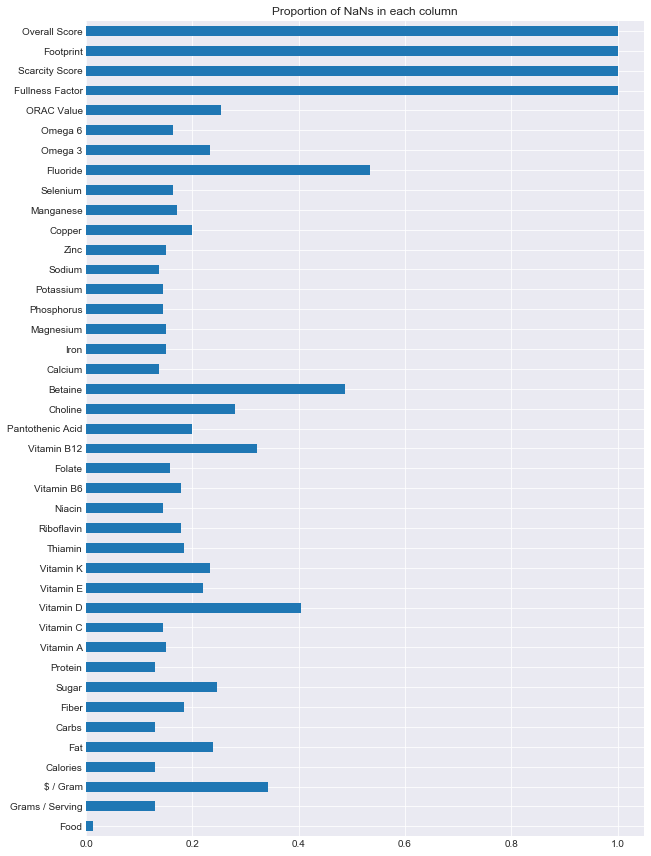

In [1575]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

plt.figure(figsize=(10, 15))
df.isnull().mean(axis=0).plot.barh()
plt.title("Proportion of NaNs in each column")

Because there is a large variance in terms of which columns are well represented and those that are not we can get a better picture of data retrieved and data that remains to be retireved or is not available. 

The graphs below show the ten most incomplete categories and the ten most complete respectively. Clearly pricing data is most needed with around 65% of prices reported.

Text(0.5,1,'Proportion of NaNs in each column')

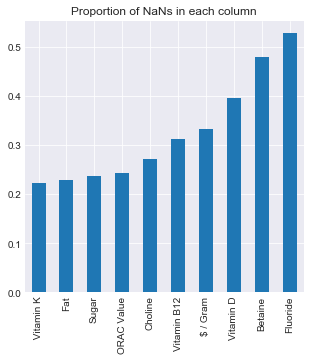

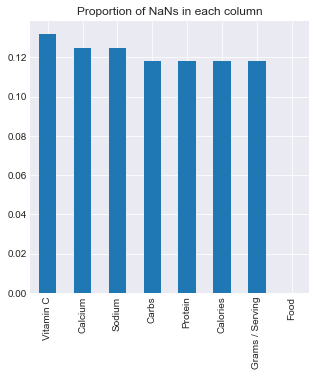

In [1653]:
df = df.dropna(axis=0, how='all')
plt.figure(figsize=(5, 5))
df.isnull().mean(axis=0).drop(['Overall Score', 'Footprint', 'Scarcity Score', 'Fullness Factor']).sort_values(ascending= True)[-10:].plot.bar()
plt.title("Proportion of NaNs in each column")

plt.figure(figsize=(5, 5))
df.isnull().mean(axis=0).sort_values(ascending= False)[-8:].plot.bar()
plt.title("Proportion of NaNs in each column")

To determine the calorie density of each item, Calories are divided by Grams per Serving then sorted by Calories. 

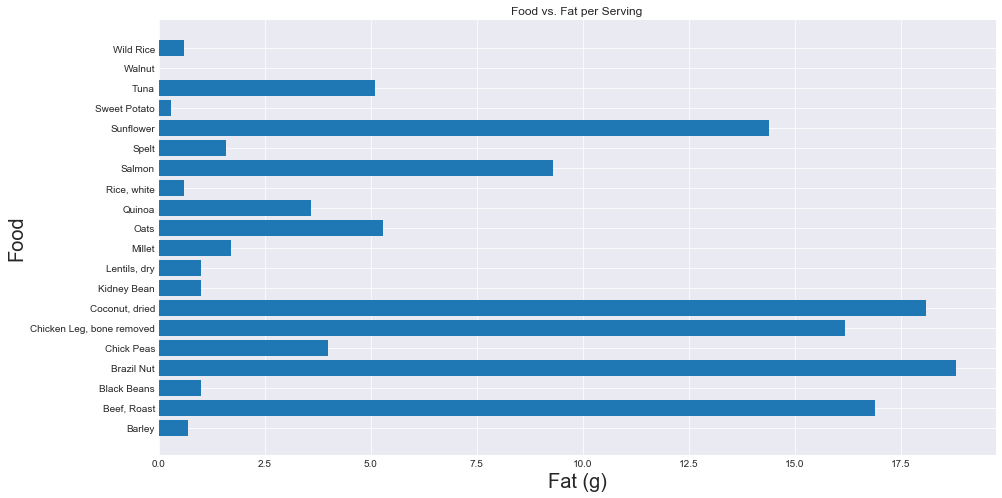

Text(0.5,1,'Food vs Calories per Serving')

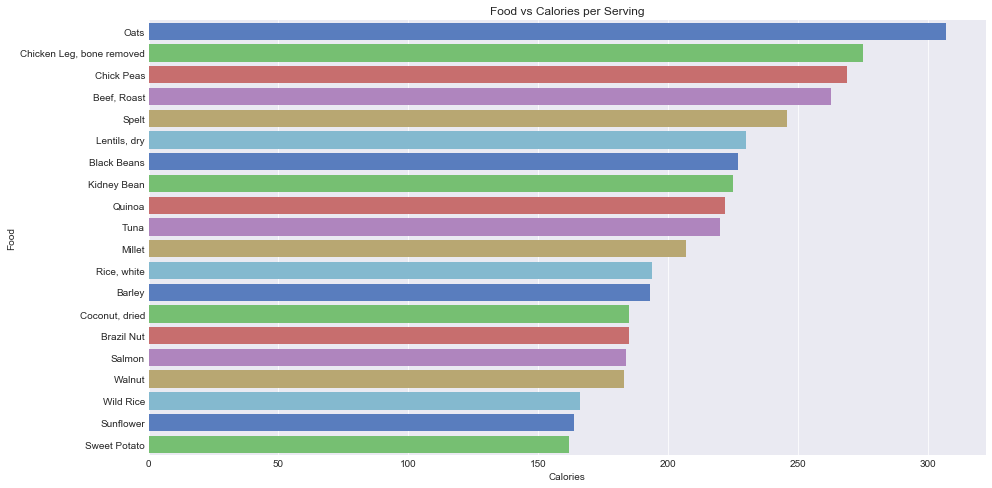

In [1655]:
df_cal_h = df.sort_values('Calories', ascending = False, na_position='last')
df_cal_h.head(10)

df_cal = df['Calories'] 
df_cal_h = df.sort_values('Calories', ascending = False, na_position='last')
df_cal_h = df_cal_h[:20]

plt.barh(df_cal_h['Food'], df_cal_h['Fat'], align='center', alpha=1.0)
plt.title('Food vs. Fat per Serving')
plt.xlabel('Fat (g)', size = 20)
plt.ylabel('Food', size = 20)
plt.show()



sns.set_style("darkgrid")
fps_bar = sns.barplot(y=df_cal_h['Food'],
                       x=df_cal_h['Calories'],
                       palette='muted')
plt.title('Food vs Calories per Serving')

In [1579]:
# Calories per Gram

df_g_serv = df['Grams / Serving']
df_cal = df['Calories'] 
df_cal_g = df_cal / df_g_serv
df_cal_g = pd.concat([df['Food'], df_cal_g], axis=1)
df_cal_g.columns = ['Food', 'Calories per Gram']
#df_cal_g = df_cal_g.sort_values('Calories per Gram', ascending = False, na_position = 'last')
df_cal_g.head()

,Food,Calories per Gram
0,Whole Milk,0.608333
1,"Mushrooms, white",0.175000
2,Eggs,1.250000
3,"Cheese, Ched",4.035714
4,Acorn Squash,0.560976


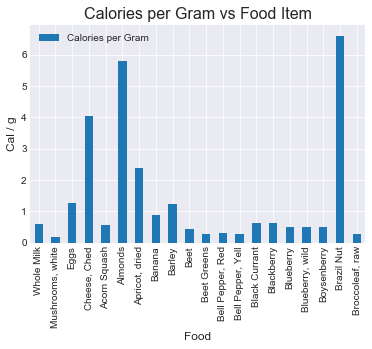

In [1580]:
# Data Visualizations using Pandas Dataframes

 
cal_g = df_cal_g[:20].plot(x = 'Food', y = 'Calories per Gram', kind = 'bar', legend = True)
cal_g.set_ylabel('Cal / g', size = 12)
cal_g.set_xlabel('Food', size = 12)
cal_g.set_title('Calories per Gram vs Food Item', size = 16)

fig = cal_g.get_figure()
fig.savefig("cal_g_test.jpg")

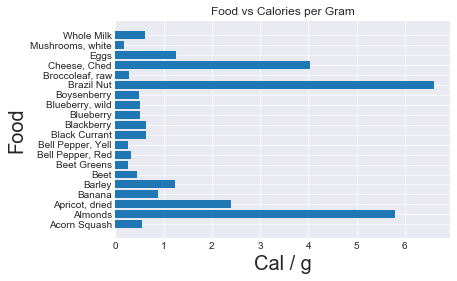

Text(0.5,1,'Food vs Calories per Gram')

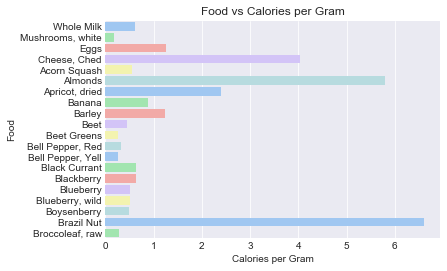

In [1656]:
# Using plotly from matplotlib 

from matplotlib import pyplot as plt
%matplotlib inline

#plt.figure(figsize=(5, 20))    
plt.barh(df_cal_g['Food'][:20], df_cal_g['Calories per Gram'][:20], align='center', alpha=1.0)
plt.title('Food vs Calories per Gram')
plt.xlabel('Cal / g', size = 20)
plt.ylabel('Food', size = 20)

plt.show()

# Plotting using seaborn

sns.set_style("darkgrid")
cpg_bar = sns.barplot(y=df_cal_g['Food'][:20],
                       x=df_cal_g['Calories per Gram'][:20],
                       palette='pastel')
plt.title('Food vs Calories per Gram')

Looking at the visualization and data there is a large amount of variation in calorie content per gram of food. Are all calories equally nourishing? Certainly not. Lets analyze the above calorie dense foods for what macronutrients are contributing the calorie density of each food. Fat, Carbohydrates, Fiber, Sugar, and Protein will be compared.

In [1657]:
# Fat
df_fat = df['Fat'] 
df_fat_g = df_fat / df_g_serv
df_fat_g.columns = ['Fat / g']
df_fat_g = pd.concat([df_cal_g, df_fat_g], axis=1)

# Rename Column above
df_fat_g.columns = ['Food', 'Cal / g', 'Fat / g']
#df_fat_g = df_fat_g.dropna().sort_values('Fat / g', ascending = False, na_position = 'last')
df_fat_g.head()

df_carb = df['Carbs'] 
df_carb_g = df_carb / df_g_serv
df_carb_g.columns = ['Carbohydrate / g']
result = pd.concat([df_fat_g, df_carb_g], axis=1)
result
# Rename Column above
result.columns = ['Food', 'Cal / g', 'Fat / g', 'Carbohydrate / g']
#result = result.dropna().sort_values('Carbohydrate / g', ascending = False, na_position = 'last')
result

# Fiber
df_fiber = df['Fiber'] 
df_fiber_g = df_fiber / df_g_serv
df_fiber_g.columns = ['Fiber / g']
result = pd.concat([df_fat_g, df_carb_g, df_fiber_g], axis=1)
result
# Rename Column above
result.columns = ['Food', 'Cal / g', 'Fat / g', 'Carbohydrate / g', 
                 'Fiber / g']
#result = result.dropna().sort_values('Cal / g', ascending = False, na_position = 'last')


# Sugar
df_sugar = df['Sugar'] 
df_sugar_g = df_sugar / df_g_serv
df_sugar_g.columns = ['Sugar / g']
result = pd.concat([df_fat_g, df_carb_g, df_fiber_g, df_sugar_g], axis=1)

# Rename Column above
result.columns = ['Food', 'Cal / g', 'Fat / g', 'Carbohydrate / g', 
                 'Fiber / g', 'Sugar / g']
#result = result.dropna().sort_values('Cal / g', ascending = False, na_position = 'last')
result

# Protein
df_protein = df['Protein'] 
df_protein_g = df_protein / df_g_serv
df_protein_g.columns = ['Protein / g']

result = pd.concat([df_fat_g, df_carb_g, df_fiber_g, df_sugar_g, df_protein_g], axis=1)

# Rename Column above
result.columns = ['Food', 'Cal / g', 'Fat / g', 'Carbohydrate / g', 
                 'Fiber / g', 'Sugar / g', 'Protein / g']
#result.dropna().sort_values('Cal / g', ascending = False, na_position = 'last')
result.head()

,Food,Cal / g,Fat / g,Carbohydrate / g,Fiber / g,Sugar / g,Protein / g
0,Whole Milk,0.608333,0.032917,0.053333,0.000000,0.053333,0.032917
1,"Mushrooms, white",0.175000,0.002500,0.027500,0.011875,0.000000,0.024375
2,Eggs,1.250000,0.089286,0.000000,0.000000,0.000000,0.107143
3,"Cheese, Ched",4.035714,0.321429,0.014286,0.000000,0.003571,0.250000
4,Acorn Squash,0.560976,0.001463,0.145854,0.043902,NaN,0.011220


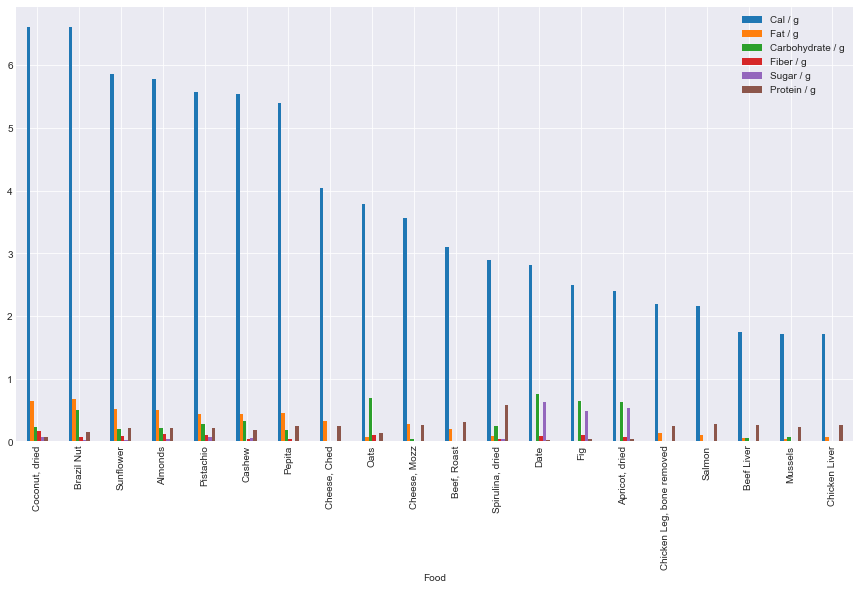

In [1584]:
# Visualize the macronutirents for the top 20 nutrient dense food items in the dataset.

result2 = result.dropna().sort_values('Cal / g', ascending = False, na_position = 'last')[:20]

plt.rcParams["figure.figsize"] = [15,8]
result2.plot(x = 'Food', kind = 'bar')
plt.show()

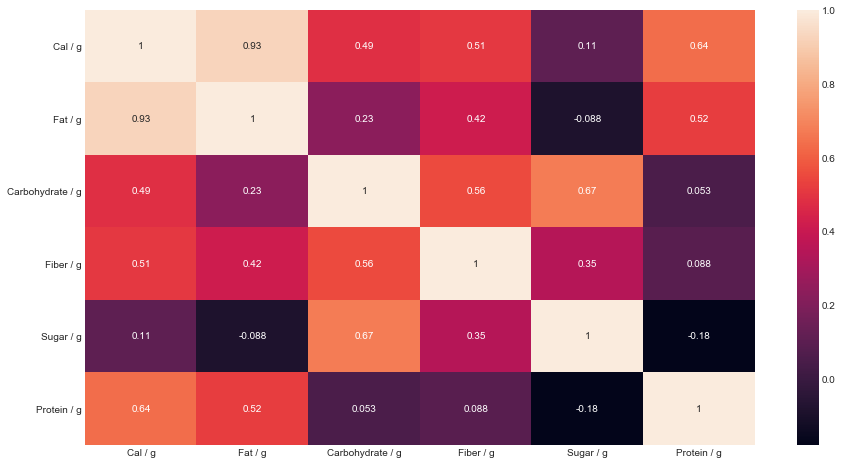

In [1585]:
# For all foods in dataset

corr = result.corr()
sns.heatmap(corr, annot = True)

###### Above: All Foods in Dataset
Looking at the correlation heatmaps produced using seaborn, calories most positively correlate with fat followed by protein (0.93, 0.64), sugar and protein had the strongest negative correlation (-0.18).

###### Below: Top 20 Calorie Dense Foods in Dataset
Looking at the correlation heatmaps produced using seaborn, calories most positively correlate fat (0.95) followed by sugar positively correlated with carbohydrates (0.74). Sugar and carbohydrates had the strongest negative correlation with protein (-0.64).

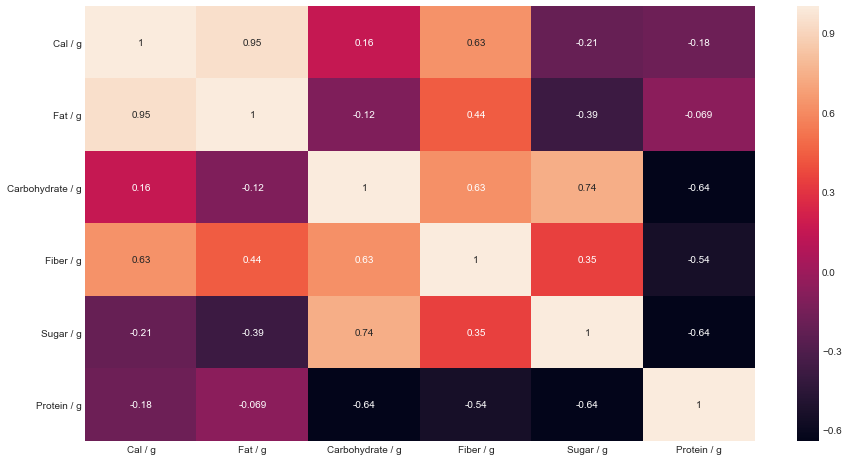

In [1587]:
# For top 20 calorie dense foods

corr = result2.corr()
sns.heatmap(corr, annot = True)

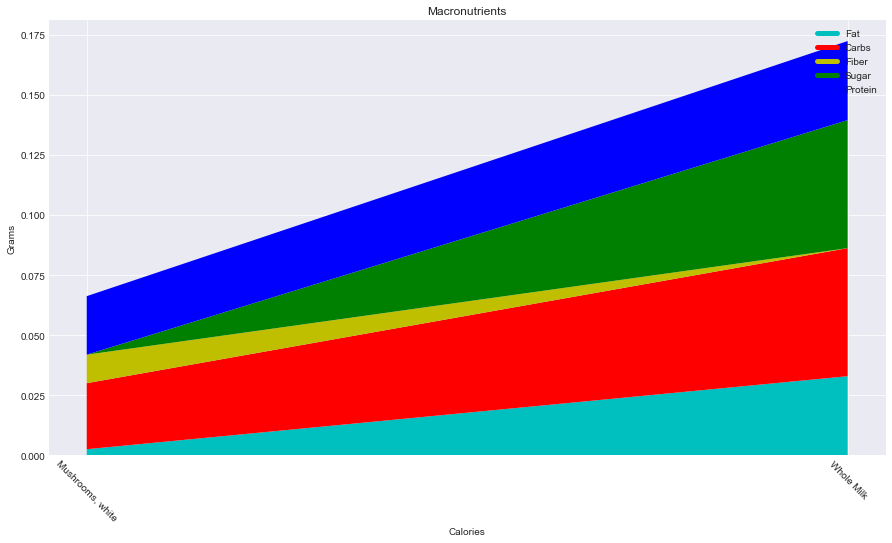

In [1616]:
# Correlation betweeen Calories, Fat, Protein, Fiber, Sugar

Food = result['Food'][:2]

Calories = result['Cal / g']
Fat = result['Fat / g'][:2]
Carbohydrates = result['Carbohydrate / g'][:2]
Fiber = result['Fiber / g'][:2]
Sugar = result['Sugar / g'][:2]
Protein =  result['Protein / g'][:2]


#plt.plot([],[],color='m', label='Calories', linewidth=5)
plt.plot([],[],color='c', label='Fat', linewidth=5)
plt.plot([],[],color='r', label='Carbs', linewidth=5)
plt.plot([],[],color='y', label='Fiber', linewidth=5)
plt.plot([],[],color='g', label='Sugar', linewidth=5)
plt.plot([],[],color='b', label='Protein', linewidth=5)
plt.legend()


plt.stackplot(Food, Fat, Carbohydrates, Fiber, Sugar, Protein, colors=['c','r','y', 'g', 'b'])

plt.xlabel('Calories')
plt.ylabel('Grams')
plt.title('Macronutrients')
plt.xticks(rotation=-45)
plt.show()

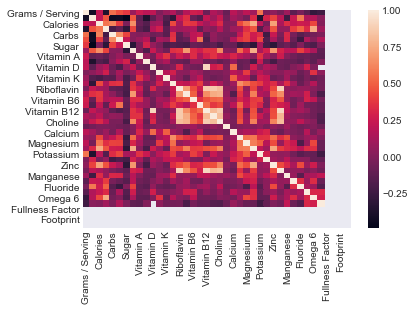

In [1659]:
corr = df_fat_h.corr()
sns.heatmap(corr)

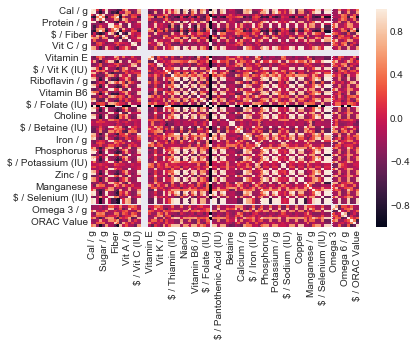

In [1660]:
corr = df_vita_h.corr()
sns.heatmap(corr)


In [1661]:
df_cal_cost =  df['$ / Gram'] / df_cal_g['Calories per Gram']
#df_cal_cost = df_cal_cost.dropna().sort_values(ascending=True)
df_cal_cost.columns = ['$ / Cal']
df_cal_cost = pd.concat([result, df_cal_cost], axis = 1)
df_cal_cost.columns = ['Food', 'Cal / g', 'Fat / g', 'Carbohydrate / g', 
                 'Fiber / g', 'Sugar / g', 'Protein / g', '$ / Cal']
#df_cal_cost = df_cal_cost.dropna().sort_values('$ / Cal', ascending=True, na_position='last')
df_cal_cost.head()

,Food,Cal / g,Fat / g,Carbohydrate / g,Fiber / g,Sugar / g,Protein / g,$ / Cal
0,Whole Milk,0.608333,0.032917,0.053333,0.000000,0.053333,0.032917,0.002609
1,"Mushrooms, white",0.175000,0.002500,0.027500,0.011875,0.000000,0.024375,0.062931
2,Eggs,1.250000,0.089286,0.000000,0.000000,0.000000,0.107143,0.003869
3,"Cheese, Ched",4.035714,0.321429,0.014286,0.000000,0.003571,0.250000,0.009006
4,Acorn Squash,0.560976,0.001463,0.145854,0.043902,NaN,0.011220,0.003927


In [1662]:
df_protein_cost =  df['$ / Gram'] / result['Protein / g']
#df_cal_cost = df_cal_cost.dropna().sort_values(ascending=True)
df_protein_cost.columns = ['$ / g Protein']
df_protein_cost = pd.concat([df_cal_cost, df_protein_cost], axis = 1)
df_protein_cost.columns = ['Food', 'Cal / g', 'Fat / g', 'Carbohydrate / g', 
                 'Fiber / g', 'Sugar / g', 'Protein / g', '$ / Cal', '$ / g Protein']
#df_protein_cost = df_protein_cost.sort_values('$ / g Protein', ascending=True, na_position='last')
df_protein_cost.head()

,Food,Cal / g,Fat / g,Carbohydrate / g,Fiber / g,Sugar / g,Protein / g,$ / Cal,$ / g Protein
0,Whole Milk,0.608333,0.032917,0.053333,0.000000,0.053333,0.032917,0.002609,0.048213
1,"Mushrooms, white",0.175000,0.002500,0.027500,0.011875,0.000000,0.024375,0.062931,0.451815
2,Eggs,1.250000,0.089286,0.000000,0.000000,0.000000,0.107143,0.003869,0.045139
3,"Cheese, Ched",4.035714,0.321429,0.014286,0.000000,0.003571,0.250000,0.009006,0.145376
4,Acorn Squash,0.560976,0.001463,0.145854,0.043902,NaN,0.011220,0.003927,0.196354


In [1615]:
list(df)

['Food',
 'Grams / Serving',
 '$ / Gram',
 'Calories',
 'Fat',
 'Carbs',
 'Fiber',
 'Sugar',
 'Protein',
 'Vitamin A',
 'Vitamin C',
 'Vitamin D',
 'Vitamin E',
 ' Vitamin K',
 'Thiamin',
 'Riboflavin',
 'Niacin',
 'Vitamin B6',
 'Folate',
 'Vitamin B12',
 'Pantothenic Acid',
 'Choline',
 'Betaine',
 'Calcium',
 'Iron',
 'Magnesium',
 'Phosphorus',
 'Potassium',
 'Sodium',
 'Zinc',
 'Copper',
 'Manganese',
 'Selenium',
 'Fluoride',
 'Omega 3',
 'Omega 6',
 'ORAC Value',
 'Fullness Factor',
 'Scarcity Score',
 'Footprint',
 'Overall Score']

In [1647]:
df_food = df['Food']


# ['Food',
# 'Grams / Serving',
#  '$ / Gram',
#  'Calories',

df_cal_cost =  df['$ / Gram'] / df_cal_g['Calories per Gram']
#df_cal_cost = df_cal_cost.dropna().sort_values(ascending=True)
df_cal_cost
df_cal_cost.columns = ['$ / Cal']
df_cal_cost = pd.concat([result, df_cal_cost], axis = 1)
df_cal_cost.columns = ['Food', 'Cal / g', 'Fat / g', 'Carbohydrate / g', 
                 'Fiber / g', 'Sugar / g', 'Protein / g', '$ / Cal']
#df_cal_cost = df_cal_cost.dropna().sort_values('$ / Cal', ascending=True, na_position='last')
df_cal_cost.head()


#  'Fat',
#  'Carbs',
#  'Fiber',

df_fiber = df['Fiber']
df_fiber_g = df_fiber / df['Grams / Serving']
df_fiber = pd.concat([df_food, df_fiber, df_fiber_g], axis = 1).sort_values('Fiber', ascending = False).dropna()
df_fiber_cost =  df['$ / Gram'] / (df_fiber['Fiber'] / df['Grams / Serving'])
df_fiber_cost = pd.concat([df_fiber, df_fiber_cost], axis = 1)
df_fiber_cost.columns = ['Food', 'Fiber', 'Fiber / g', '$ / Fiber']
#df_fiber_cost = df_fiber_cost.sort_values('$ / Fiber', ascending = True).dropna()
df_fiber_cost[:20]

#  'Sugar',



#  'Protein',
df_protein_cost =  df['$ / Gram'] / result['Protein / g']
#df_cal_cost = df_cal_cost.dropna().sort_values(ascending=True)
df_protein_cost.columns = ['$ / g Protein']
df_protein_cost = pd.concat([df_cal_cost, df_protein_cost], axis = 1)
df_protein_cost.columns = ['Food', 'Cal / g', 'Fat / g', 'Carbohydrate / g', 
                 'Fiber / g', 'Sugar / g', 'Protein / g', '$ / Cal', '$ / g Protein']
#df_protein_cost = df_protein_cost.sort_values('$ / g Protein', ascending=True, na_position='last')
df_protein_cost.head()


#  'Vitamin A',

df_vita = df['Vitamin A']
df_vita_g = df_vita / df['Grams / Serving']
df_vita = pd.concat([df_food, df_vita, df_vita_g], axis = 1).sort_values('Vitamin A', ascending = False).dropna()
df_vita_cost =  df['$ / Gram'] / (df_vita['Vitamin A'] / df['Grams / Serving'])
df_vita_cost = pd.concat([df_vita, df_vita_cost], axis = 1)
df_vita_cost.columns = ['Food', 'Vitamin A', 'Vit A / g', '$ / Vit A (IU)']
#df_vita_cost = df_vita_cost.sort_values('$ / Vit A (IU)', ascending = True).dropna()
df_vita_cost[:20]


#  'Vitamin C',

df_vitc = df['Vitamin C']
df_vitc_g = df_vitc / df['Grams / Serving']
df_vitc = pd.concat([df_food, df_vitc, df_vitc_g], axis = 1).sort_values('Vitamin C', ascending = False).dropna()
df_vitc_cost =  df['$ / Gram'] / (df_vitc['Vitamin C'] / df['Grams / Serving'])
df_vitc_cost = pd.concat([df_vitc, df_vitc_cost], axis = 1)
df_vitc_cost.columns = ['Food', 'Vitamin C', 'Vit C / g', '$ / Vit C (IU)']
#df_vitc_cost = df_vitc_cost.sort_values('$ / Vit C (IU)', ascending = True).dropna()
df_vitc_cost[:20]

#  'Vitamin D',

df_vitd = df['Vitamin D']
df_vitd_g = df_vitd / df['Grams / Serving']
df_vitd = pd.concat([df_food, df_vitd], axis = 1).sort_values('Vitamin D', ascending = False).dropna()
df_vitd_cost =  df['$ / Gram'] / (df_vitd['Vitamin D'] / df['Grams / Serving'])
df_vitd_cost = pd.concat([df_vitd, df_vitd_cost, df_vitd_g], axis = 1)
df_vitd_cost.columns = ['Food', 'Vitamin D', 'Vit D / g', '$ / Vit D (IU)']
#df_vitd_cost = df_vitd_cost.sort_values('Vitamin D', ascending = False).dropna()
df_vitd_cost = df_vitd_cost.replace(np.inf, np.nan).dropna()
df_vitd_cost[:20]

#  'Vitamin E',

df_vite = df['Vitamin E']
df_vite_g = df_vite / df['Grams / Serving']
df_vite = pd.concat([df_food, df_vite, df_vite_g], axis = 1).sort_values('Vitamin E', ascending = False).dropna()
df_vite_cost =  df['$ / Gram'] / (df_vite['Vitamin E'] / df['Grams / Serving'])
df_vite_cost = pd.concat([df_vite, df_vite_cost], axis = 1)
df_vite_cost.columns = ['Food', 'Vitamin E', 'Vit E / g', '$ / Vit E (IU)']
#df_vite_cost = df_vite_cost.sort_values('$ / Vit E (IU)', ascending = True).dropna()
df_vite_cost[:20]

#  ' Vitamin K',

df_vitk = df[' Vitamin K']
df_vitk_g = df_vitk / df['Grams / Serving']
df_vitk = pd.concat([df_food, df_vitk, df_vitk_g], axis = 1).sort_values(' Vitamin K', ascending = False).dropna()
df_vitk_cost =  df['$ / Gram'] / (df_vitk[' Vitamin K'] / df['Grams / Serving'])
df_vitk_cost = pd.concat([df_vitk, df_vitk_cost], axis = 1)
df_vitk_cost.columns = ['Food', 'Vitamin K', 'Vit K / g', '$ / Vit K (IU)']
#df_vitk_cost = df_vitk_cost.sort_values('$ / Vit K (IU)', ascending = True).dropna()
df_vitk_cost[:20]


# Thiamin

df_thiamin = df['Thiamin']
df_thiamin_g = df_thiamin / df['Grams / Serving']
df_thiamin = pd.concat([df_food, df_thiamin, df_thiamin_g], axis = 1).sort_values('Thiamin', ascending = False).dropna()
df_thiamin_cost =  df['$ / Gram'] / (df_thiamin['Thiamin'] / df['Grams / Serving'])
df_thiamin_cost = pd.concat([df_thiamin, df_thiamin_cost], axis = 1)
df_thiamin_cost.columns = ['Food', 'Thiamin', 'Thiamin / g', '$ / Thiamin (IU)']
#df_thiamin_cost = df_thiamin_cost.sort_values('$ / Thiamin (IU)', ascending = True).dropna()
df_thiamin_cost[:20]

# Riboflavin

df_riboflavin = df['Riboflavin']
df_riboflavin_g = df_riboflavin / df['Grams / Serving']
df_riboflavin = pd.concat([df_food, df_riboflavin, df_riboflavin_g], axis = 1).sort_values('Riboflavin', ascending = False).dropna()
df_riboflavin_cost =  df['$ / Gram'] / (df_riboflavin['Riboflavin'] / df['Grams / Serving'])
df_riboflavin_cost = pd.concat([df_riboflavin, df_riboflavin_cost], axis = 1)
df_riboflavin_cost.columns = ['Food', 'Riboflavin', 'Riboflavin / g', '$ / Riboflavin (IU)']
#df_riboflavin_cost = df_riboflavin_cost.sort_values('$ / Riboflavin (IU)', ascending = True).dropna()
df_riboflavin_cost[:20]

# Niacin

df_niacin = df['Niacin']
df_niacin_g = df_niacin / df['Grams / Serving']
df_niacin = pd.concat([df_food, df_niacin, df_niacin_g], axis = 1).sort_values('Niacin', ascending = False).dropna()
df_niacin_cost =  df['$ / Gram'] / (df_niacin['Niacin'] / df['Grams / Serving'])
df_niacin_cost = pd.concat([df_niacin, df_niacin_cost], axis = 1)
df_niacin_cost.columns = ['Food', 'Niacin', 'Niacin / g', '$ / Niacin (IU)']
#df_niacin_cost = df_niacin_cost.sort_values('$ / Niacin (IU)', ascending = True).dropna()
df_niacin_cost[:20]

#  'Vitamin B6'

df_vitb6 = df['Vitamin B6']
df_vitb6_g = df_vitb6 / df['Grams / Serving']


df_vitb6 = pd.concat([df_food, df_vitb6, df_vitb6_g], axis = 1).sort_values('Vitamin B6', ascending = False).dropna()
df_vitb6

df_vitb6_cost =  df['$ / Gram'] / (df_vitb6['Vitamin B6'] / df['Grams / Serving'])
df_vitb6_cost = pd.concat([df_vitb6, df_vitb6_cost], axis = 1)
df_vitb6_cost.columns = ['Food', 'Vitamin B6', 'Vitamin B6 / g', '$ / Vitamin B6 (IU)']
#df_vitb6_cost = df_vitb6_cost.sort_values('$ / Vitamin B6 (IU)', ascending = True).dropna()
df_vitb6_cost[:20]

#  'Folate',

df_folate = df['Folate']
df_folate_g = df_folate / df['Grams / Serving']
df_folate = pd.concat([df_food, df_folate, df_folate_g], axis = 1).sort_values('Folate', ascending = False).dropna()
df_folate_cost =  df['$ / Gram'] / (df_folate['Folate'] / df['Grams / Serving'])
df_folate_cost = pd.concat([df_folate, df_folate_cost], axis = 1)
df_folate_cost.columns = ['Food', 'Folate', 'Folate / g', '$ / Folate (IU)']
#df_folate_cost = df_folate_cost.sort_values('$ / Folate (IU)', ascending = True).dropna()
df_folate_cost[:20]

#  'Vitamin B12',
import numpy as np

df_vitb12_cost = df_cost_g.replace(np.inf, np.nan).dropna()
df_vitb12 = df['Vitamin B12']
df_vitb12 = pd.concat([df_food, df_vitb12], axis = 1).sort_values('Vitamin B12', ascending = False).dropna()
df_vitb12_cost =  df['$ / Gram'] / (df_vitb12['Vitamin B12'] / df['Grams / Serving'])
df_vitb12_cost = pd.concat([df_vitb12, df_vitb12_cost], axis = 1)
df_vitb12_cost.columns = ['Food', 'Vitamin B12', '$ / B12 (IU)']
#df_vitb12_cost = df_vitb12_cost.sort_values('$ / B12 (IU)', ascending = True).dropna()
df_vitb12_cost = df_cost_g.replace(np.inf, np.nan).dropna()
df_vitb12_cost[:20]


#  'Pantothenic Acid',

df_pa = df['Pantothenic Acid']
df_pa_g = df_pa / df['Grams / Serving']
df_pa = pd.concat([df_food, df_pa, df_pa_g], axis = 1).sort_values('Pantothenic Acid', ascending = False).dropna()
df_pa_cost =  df['$ / Gram'] / (df_pa['Pantothenic Acid'] / df['Grams / Serving'])
df_pa_cost = pd.concat([df_pa, df_pa_cost], axis = 1)
df_pa_cost.columns = ['Food', 'Pantothenic Acid', 'Pantothenic Acid / g', '$ / Pantothenic Acid (IU)']
#df_pa_cost = df_pa_cost.sort_values('$ / Pantothenic Acid (IU)', ascending = True).dropna()
df_pa_cost[:20]

#  'Choline',

df_choline = df['Choline']
df_choline_g = df_choline / df['Grams / Serving']
df_choline = pd.concat([df_food, df_choline, df_choline_g], axis = 1).sort_values('Choline', ascending = False).dropna()
df_choline_cost =  df['$ / Gram'] / (df_choline['Choline'] / df['Grams / Serving'])
df_choline_cost = pd.concat([df_choline, df_choline_cost], axis = 1)
df_choline_cost.columns = ['Food', 'Choline', 'Choline / g', '$ / Choline (IU)']
#df_choline_cost = df_choline_cost.sort_values('$ / Choline (IU)', ascending = True).dropna()
df_choline_cost[:20]

#  'Betaine',

df_betaine = df['Betaine']
df_betaine_g = df_betaine / df['Grams / Serving']
df_betaine = pd.concat([df_food, df_betaine, df_betaine_g], axis = 1).sort_values('Betaine', ascending = False).dropna()
df_betaine_cost =  df['$ / Gram'] / (df_betaine['Betaine'] / df['Grams / Serving'])
df_betaine_cost = pd.concat([df_betaine, df_betaine_cost], axis = 1)
df_betaine_cost.columns = ['Food', 'Betaine', 'Betaine / g', '$ / Betaine (IU)']
#df_betaine_cost = df_betaine_cost.sort_values('$ / Betaine (IU)', ascending = True).dropna()
df_betaine_cost[:20]

#  'Calcium',

df_Ca = df['Calcium']
df_Ca_g = df_Ca / df['Grams / Serving']
df_Ca = pd.concat([df_food, df_Ca, df_Ca_g], axis = 1).sort_values('Calcium', ascending = False).dropna()
df_Ca_cost =  df['$ / Gram'] / (df_Ca['Calcium'] / df['Grams / Serving'])
df_Ca_cost = pd.concat([df_Ca, df_Ca_cost], axis = 1)
df_Ca_cost.columns = ['Food', 'Calcium', 'Calcium / g', '$ / Calcium (IU)']
#df_Ca_cost = df_Ca_cost.sort_values('$ / Calcium (IU)', ascending = True).dropna()
df_Ca_cost[:20]

#  'Iron',

df_Fe = df['Iron']
df_Fe_g = df_Fe / df['Grams / Serving']
df_Fe = pd.concat([df_food, df_Fe, df_Fe_g], axis = 1).sort_values('Iron', ascending = False).dropna()
df_Fe_cost =  df['$ / Gram'] / (df_Fe['Iron'] / df['Grams / Serving'])
df_Fe_cost = pd.concat([df_Fe, df_Fe_cost], axis = 1)
df_Fe_cost.columns = ['Food', 'Iron', 'Iron / g', '$ / Iron (IU)']
#df_Fe_cost = df_Fe_cost.sort_values('$ / Iron (IU)', ascending = True).dropna()
df_Fe_cost[:20]


#  'Magnesium',

df_Mg = df['Magnesium']
df_Mg_g = df_Mg / df['Grams / Serving']
df_Mg = pd.concat([df_food, df_Mg, df_Mg_g], axis = 1).sort_values('Magnesium', ascending = False).dropna()
df_Mg_cost =  df['$ / Gram'] / (df_Mg['Magnesium'] / df['Grams / Serving'])
df_Mg_cost = pd.concat([df_Mg, df_Mg_cost], axis = 1)
df_Mg_cost.columns = ['Food', 'Magnesium', 'Magnesium / g', '$ / Magnesium (IU)']
#df_Mg_cost = df_Mg_cost.sort_values('$ / Magnesium (IU)', ascending = True).dropna()
df_Mg_cost[:20]


#  'Phosphorus',

df_P = df['Phosphorus']
df_P_g = df_P / df['Grams / Serving']
df_P = pd.concat([df_food, df_P, df_P_g], axis = 1).sort_values('Phosphorus', ascending = False).dropna()
df_P_cost =  df['$ / Gram'] / (df_P['Phosphorus'] / df['Grams / Serving'])
df_P_cost = pd.concat([df_P, df_P_cost], axis = 1)
df_P_cost.columns = ['Food', 'Phosphorus', 'Phosphorus / g', '$ / Phosphorus (IU)']
#df_P_cost = df_P_cost.sort_values('$ / Phosphorus (IU)', ascending = True).dropna()
df_P_cost[:20]


#  'Potassium',


df_K = df['Potassium']
df_K_g = df_K / df['Grams / Serving']
df_K = pd.concat([df_food, df_K, df_K_g], axis = 1).sort_values('Potassium', ascending = False).dropna()
df_K_cost =  df['$ / Gram'] / (df_K['Potassium'] / df['Grams / Serving'])
df_K_cost = pd.concat([df_P, df_K_cost], axis = 1)
df_K_cost.columns = ['Food', 'Potassium', 'Potassium / g', '$ / Potassium (IU)']
#df_K_cost = df_K_cost.sort_values('$ / Potassium (IU)', ascending = True).dropna()
df_K_cost[:20]


#  'Sodium',

df_Na = df['Sodium']
df_Na_g = df_Na / df['Grams / Serving']
df_Na = pd.concat([df_food, df_Na, df_Na_g], axis = 1).sort_values('Sodium', ascending = False).dropna()
df_Na_cost =  df['$ / Gram'] / (df_Na['Sodium'] / df['Grams / Serving'])
df_Na_cost = pd.concat([df_Na, df_Na_cost], axis = 1)
df_Na_cost.columns = ['Food', 'Sodium', 'Sodium / g', '$ / Sodium (IU)']
#df_Na_cost = df_Na_cost.sort_values('$ / Sodium (IU)', ascending = True).dropna()
df_Na_cost[:20]

#  'Zinc',


df_Zn = df['Zinc']
df_Zn_g = df_Zn / df['Grams / Serving']
df_Zn = pd.concat([df_food, df_Zn, df_Zn_g], axis = 1).sort_values('Zinc', ascending = False).dropna()
df_Zn_cost =  df['$ / Gram'] / (df_Zn['Zinc'] / df['Grams / Serving'])
df_Zn_cost = pd.concat([df_Zn, df_Zn_cost], axis = 1)
df_Zn_cost.columns = ['Food', 'Zinc', 'Zinc / g', '$ / Zinc (IU)']
#df_Zn_cost = df_Zn_cost.sort_values('$ / Zinc (IU)', ascending = True).dropna()
df_Zn_cost[:20]


#  'Copper',

df_Cu = df['Copper']
df_Cu_g = df_Cu / df['Grams / Serving']
df_Cu = pd.concat([df_food, df_Cu, df_Cu_g], axis = 1).sort_values('Copper', ascending = False).dropna()
df_Cu_cost =  df['$ / Gram'] / (df_Cu['Copper'] / df['Grams / Serving'])
df_Cu_cost = pd.concat([df_Cu, df_Cu_cost], axis = 1)
df_Cu_cost.columns = ['Food', 'Copper', 'Copper / g', '$ / Copper (IU)']
#df_Cu_cost = df_Cu_cost.sort_values('$ / Copper (IU)', ascending = True).dropna()
df_Cu_cost[:20]


#  'Manganese',

df_Mn = df['Manganese']
df_Mn_g = df_Mn / df['Grams / Serving']
df_Mn = pd.concat([df_food, df_Mn, df_Mn_g], axis = 1).sort_values('Manganese', ascending = False).dropna()
df_Mn_cost =  df['$ / Gram'] / (df_Mn['Manganese'] / df['Grams / Serving'])
df_Mn_cost = pd.concat([df_Mn, df_Mn_cost], axis = 1)
df_Mn_cost.columns = ['Food', 'Manganese', 'Manganese / g', '$ / Manganese (IU)']
#df_Mn_cost = df_Mn_cost.sort_values('$ / Manganese (IU)', ascending = True).dropna()
df_Mn_cost[:20]


#  'Selenium',

df_Se = df['Selenium']
df_Se_g = df_Se / df['Grams / Serving']
df_Se = pd.concat([df_food, df_Se, df_Se_g], axis = 1).sort_values('Selenium', ascending = False).dropna()
df_Se_cost =  df['$ / Gram'] / (df_Se['Selenium'] / df['Grams / Serving'])
df_Se_cost = pd.concat([df_Se, df_Se_cost], axis = 1)
df_Se_cost.columns = ['Food', 'Selenium', 'Selenium / g', '$ / Selenium (IU)']
#df_Se_cost = df_Se_cost.sort_values('$ / Selenium (IU)', ascending = True).dropna()
df_Se_cost[:20]

#  'Fluoride',

df_F = df['Fluoride']
df_F_g = df_F / df['Grams / Serving']
df_F = pd.concat([df_food, df_F, df_F_g], axis = 1).sort_values('Fluoride', ascending = False).dropna()
df_F_cost =  df['$ / Gram'] / (df_F['Fluoride'] / df['Grams / Serving'])
df_F_cost = pd.concat([df_F, df_F_cost], axis = 1)
df_F_cost.columns = ['Food', 'Fluoride', 'Fluoride / g', '$ / Fluoride (IU)']
#df_F_cost = df_F_cost.sort_values('$ / Fluoride (IU)', ascending = True).dropna()
df_F_cost[:20]


#  'Omega 3',

df_o3 = df['Omega 3']
df_o3_g = df_o3 / df['Grams / Serving']
df_o3 = pd.concat([df_food, df_o3, df_o3_g], axis = 1).sort_values('Omega 3', ascending = False).dropna()
df_o3_cost =  df['$ / Gram'] / (df_o3['Omega 3'] / df['Grams / Serving'])
df_o3_cost = pd.concat([df_o3, df_o3_cost], axis = 1)
df_o3_cost.columns = ['Food', 'Omega 3', 'Omega 3 / g', '$ / Omega 3 (IU)']
#df_o3_cost = df_o3_cost.sort_values('$ / Omega 3 (IU)', ascending = True).dropna()
df_o3_cost[:20]


#  'Omega 6',

df_o6 = df['Omega 6']
df_o6_g = df_o6 / df['Grams / Serving']
df_o6 = pd.concat([df_food, df_o6, df_o6_g], axis = 1).sort_values('Omega 6', ascending = False).dropna()
df_o6_cost =  df['$ / Gram'] / (df_o6['Omega 6'] / df['Grams / Serving'])
df_o6_cost = pd.concat([df_o6, df_o6_cost], axis = 1)
df_o6_cost.columns = ['Food', 'Omega 6', 'Omega 6 / g', '$ / Omega 6 (IU)']
#df_o6_cost = df_o6_cost.sort_values('$ / Omega 6 (IU)', ascending = True).dropna()
df_o6_cost[:20]

#  'ORAC Value',

df_orac = df['ORAC Value'] 
df_orac_g = df_orac * df['Grams / Serving'] / 100
df_orac = pd.concat([df_food, df_orac, df_orac_g], axis = 1).sort_values('ORAC Value', ascending = False).dropna()
df_orac_cost =  df['$ / Gram'] / (df_orac['ORAC Value'] / df['Grams / Serving'])
df_orac_cost = pd.concat([df_orac, df_orac_cost], axis = 1)
df_orac_cost.columns = ['Food', 'ORAC Value', 'ORAC Value / g', '$ / ORAC Value']
#df_orac_cost = df_orac_cost.sort_values('$ / ORAC Value', ascending = True).dropna()
df_orac_cost[:20]


#  'Fullness Factor',
#  'Scarcity Score',
#  'Footprint',
#  'Overall Score']



,Food,ORAC Value,ORAC Value / g,$ / ORAC Value
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,Acorn Squash,396.0,811.80,0.001140
5,Almonds,4454.0,1247.12,0.000100
6,"Apricot, dried",3234.0,905.52,NaN
7,Banana,795.0,938.10,0.000262
8,Barley,1190.0,1868.30,NaN
9,Beet,1776.0,1776.00,0.000248


In [1663]:
# A new dataframe is created by concatenating the above dataframes using pandas.
# Note that df_cost is broken into two steps b/c pandas limit of concatenating 12 df

df_cost1 = pd.concat([df_protein_cost, df_fiber_cost.drop(labels = 'Food', axis = 1),
                     df_vita_cost.drop(labels = 'Food', axis = 1),
                     df_vitc_cost.drop(labels = 'Food', axis = 1),
                     df_vitd_cost.drop(labels = 'Food', axis = 1),
                     df_vite_cost.drop(labels = 'Food', axis = 1),
                     df_vitk_cost.drop(labels = 'Food', axis = 1),
                     df_thiamin_cost.drop(labels = 'Food', axis = 1),
                     df_riboflavin_cost.drop(labels = 'Food', axis = 1),
                     df_niacin_cost.drop(labels = 'Food', axis = 1),
                     df_vitb6_cost.drop(labels = 'Food', axis = 1),
                     df_folate_cost.drop(labels = 'Food', axis = 1)], axis = 1)
#df_cost = df_cost.dropna()
df_cost1

df_cost = pd.concat([df_cost1, df_vitb12_cost,
                      df_pa_cost.drop(labels = 'Food', axis = 1),
                      df_choline_cost.drop(labels = 'Food', axis = 1),
                      df_betaine_cost.drop(labels = 'Food', axis = 1),
                      df_Ca_cost.drop(labels = 'Food', axis = 1),
                      df_Fe_cost.drop(labels = 'Food', axis = 1),
                      df_Mg_cost.drop(labels = 'Food', axis = 1),
                      df_P_cost.drop(labels = 'Food', axis = 1),
                      df_K_cost.drop(labels = 'Food', axis = 1),
                      df_Na_cost.drop(labels = 'Food', axis = 1),
                      df_Zn_cost.drop(labels = 'Food', axis = 1),
                      df_Cu_cost.drop(labels = 'Food', axis = 1),
                      df_Mn_cost.drop(labels = 'Food', axis = 1),
                      df_Se_cost.drop(labels = 'Food', axis = 1),
                      df_F_cost.drop(labels = 'Food', axis = 1),
                      df_o3_cost.drop(labels = 'Food', axis = 1),
                      df_o6_cost.drop(labels = 'Food', axis = 1),
                      df_orac_cost.drop(labels = 'Food', axis = 1)], axis = 1)
df_cost

,Food,Cal / g,Fat / g,Carbohydrate / g,Fiber / g,Sugar / g,Protein / g,$ / Cal,$ / g Protein,Fiber,...,$ / Fluoride (IU),Omega 3,Omega 3 / g,$ / Omega 3 (IU),Omega 6,Omega 6 / g,$ / Omega 6 (IU),ORAC Value,ORAC Value / g,$ / ORAC Value
0,Whole Milk,0.608333,0.032917,0.053333,0.000000,0.053333,0.032917,0.002609,0.048213,0.0,...,NaN,183.0,0.762500,0.002081,293.0,1.220833,0.001300,NaN,NaN,NaN
1,"Mushrooms, white",0.175000,0.002500,0.027500,0.011875,0.000000,0.024375,0.062931,0.451815,1.9,...,inf,0.0,0.000000,inf,173.0,1.081250,0.010185,NaN,NaN,NaN
2,Eggs,1.250000,0.089286,0.000000,0.000000,0.000000,0.107143,0.003869,0.045139,0.0,...,0.123106,75.9,1.355357,0.003568,1077.0,19.232143,0.000251,NaN,NaN,NaN
3,"Cheese, Ched",4.035714,0.321429,0.014286,0.000000,0.003571,0.250000,0.009006,0.145376,0.0,...,0.103840,102.0,3.642857,0.009977,162.0,5.785714,0.006282,NaN,NaN,NaN
4,Acorn Squash,0.560976,0.001463,0.145854,0.043902,NaN,0.011220,0.003927,0.196354,9.0,...,inf,75.9,0.370244,0.005950,45.1,0.220000,0.010014,396.0,811.80,0.001140
5,Almonds,5.785714,0.500000,0.217857,0.121429,0.039286,0.214286,0.002754,0.074354,3.4,...,NaN,1.7,0.060714,0.262426,3408.0,121.714286,0.000131,4454.0,1247.12,0.000100
6,"Apricot, dried",2.392857,0.003571,0.625000,0.071429,0.535714,0.032143,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,20.7,0.739286,NaN,3234.0,905.52,NaN
7,Banana,0.889831,0.003390,0.228814,0.026271,0.122034,0.011017,0.001980,0.159935,3.1,...,0.079968,31.9,0.270339,0.006518,54.3,0.460169,0.003829,795.0,938.10,0.000262
8,Barley,1.229299,0.004459,0.282166,0.038217,0.002548,0.022293,NaN,NaN,6.0,...,NaN,33.0,0.210191,NaN,303.0,1.929936,NaN,1190.0,1868.30,NaN
9,Beet,0.440000,0.002000,0.100000,0.020000,0.080000,0.017000,0.010011,0.259118,2.0,...,inf,5.0,0.050000,0.088100,58.0,0.580000,0.007595,1776.0,1776.00,0.000248


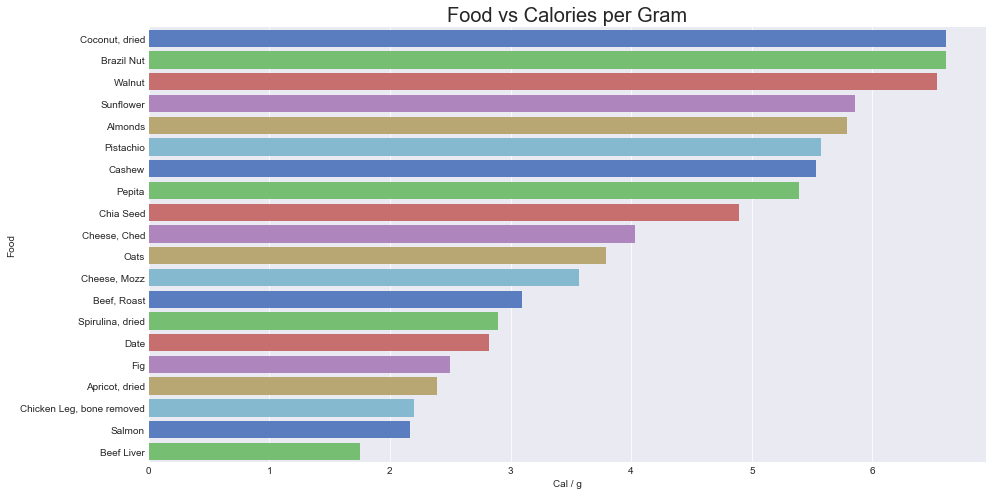

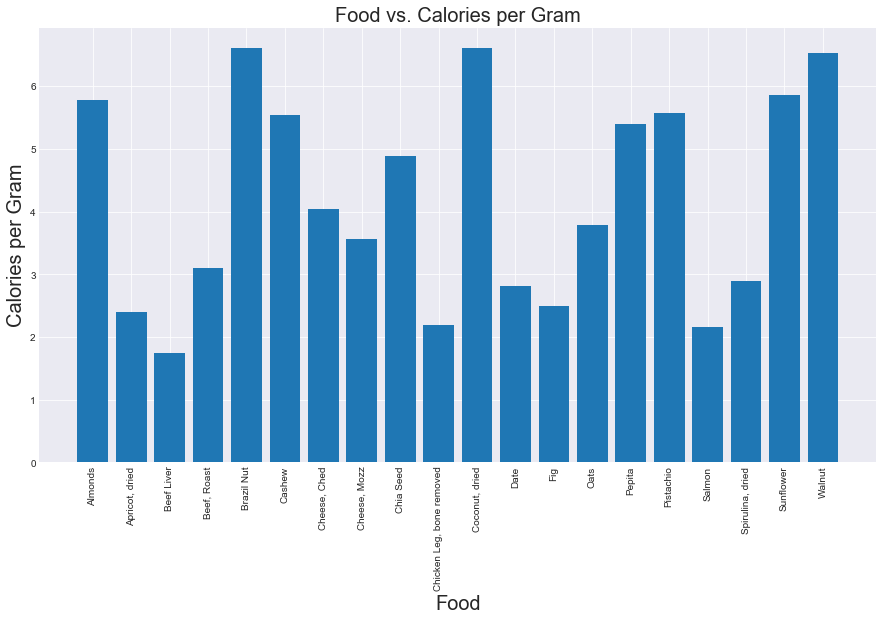

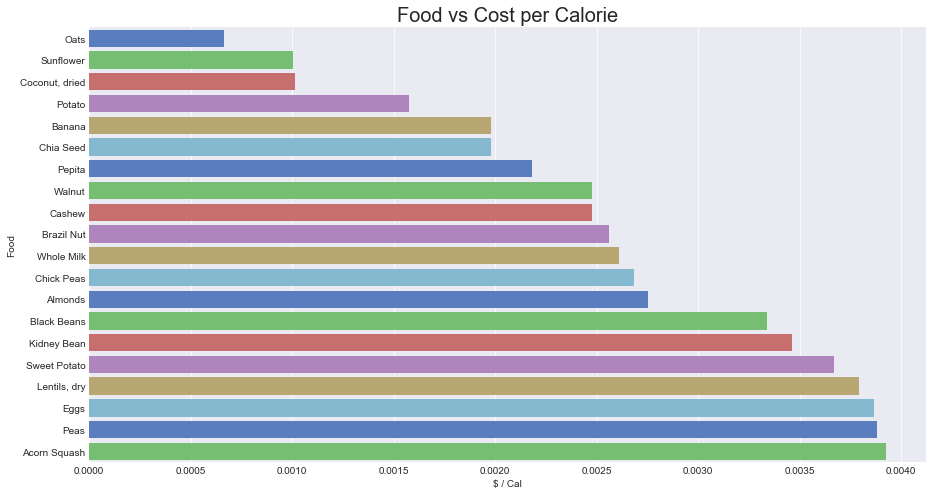

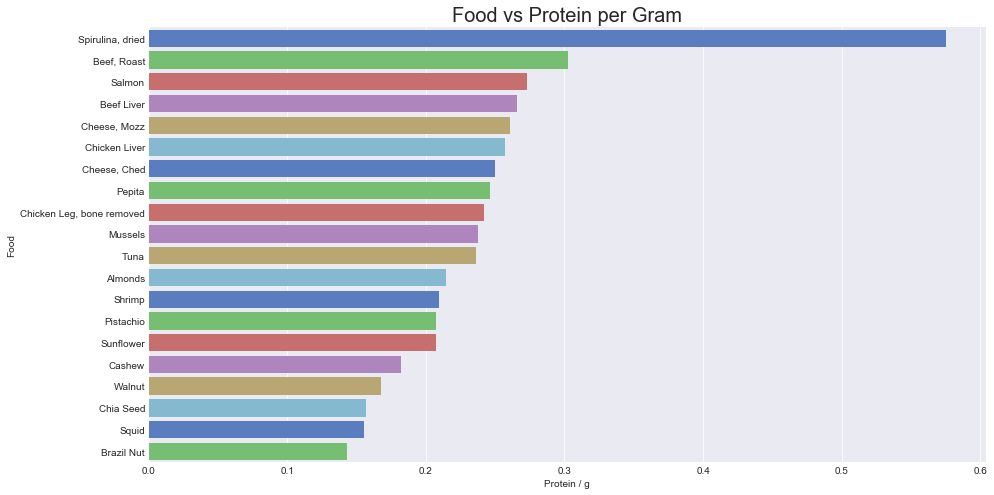

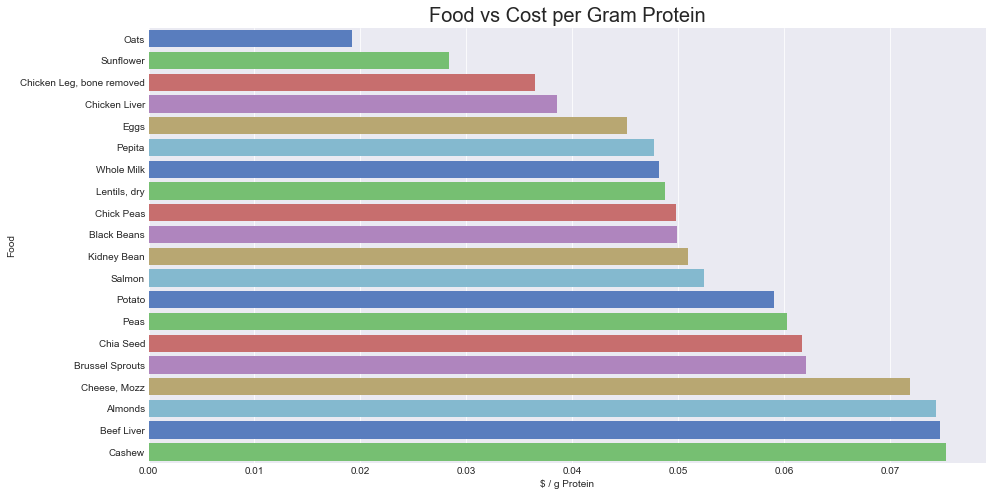

In [1644]:
# From the newly created dataframe matplotlib is used to create visualizations for each nutrient per gram
# Visualizations also show the cost of each nutrient based on food item and price


df_cal_h = df_cost.sort_values('Cal / g', ascending = False, na_position='last')
df_cal_h = df_cal_h[:20]
sns.set_style("darkgrid")
cpg_bar = sns.barplot(y=df_cal_h['Food'],
                       x=df_cal_h['Cal / g'],
                       palette='muted')
plt.title('Food vs Calories per Gram', size = 20)
plt.show()


plt.bar(df_cal_h['Food'], df_cal_h['Cal / g'], align='center', alpha=1.0)
plt.title('Food vs. Calories per Gram', size = 20)
plt.ylabel('Calories per Gram', size = 20)
plt.xticks(rotation = 90)
plt.xlabel('Food', size = 20)
plt.show()

df_cal_cost = df_cost.sort_values('$ / Cal', ascending = True, na_position='last')
df_cal_cost = df_cal_cost[:20]
sns.set_style("darkgrid")
cpc_bar = sns.barplot(y=df_cal_cost['Food'],
                       x=df_cal_cost['$ / Cal'],
                       palette='muted')
plt.title('Food vs Cost per Calorie', size = 20)
plt.show()


df_protein_h = df_cost.sort_values('Protein / g', ascending = False, na_position='last')
df_protein_h = df_protein_h[:20]
sns.set_style("darkgrid")
cpg_bar = sns.barplot(y=df_protein_h['Food'],
                       x=df_protein_h['Protein / g'],
                       palette='muted')
plt.title('Food vs Protein per Gram', size = 20)
plt.show()


df_protein_cost = df_cost.sort_values('$ / g Protein', ascending = True, na_position='last')
df_protein_cost = df_protein_cost[:20]
sns.set_style("darkgrid")
cpp_bar = sns.barplot(y=df_protein_cost['Food'],
                       x=df_protein_cost['$ / g Protein'],
                       palette='muted')
plt.title('Food vs Cost per Gram Protein', size = 20)
plt.show()

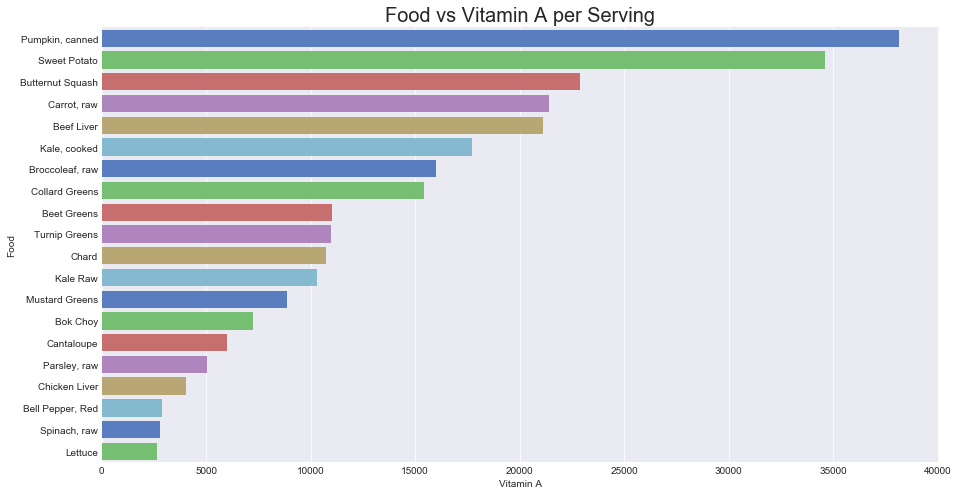

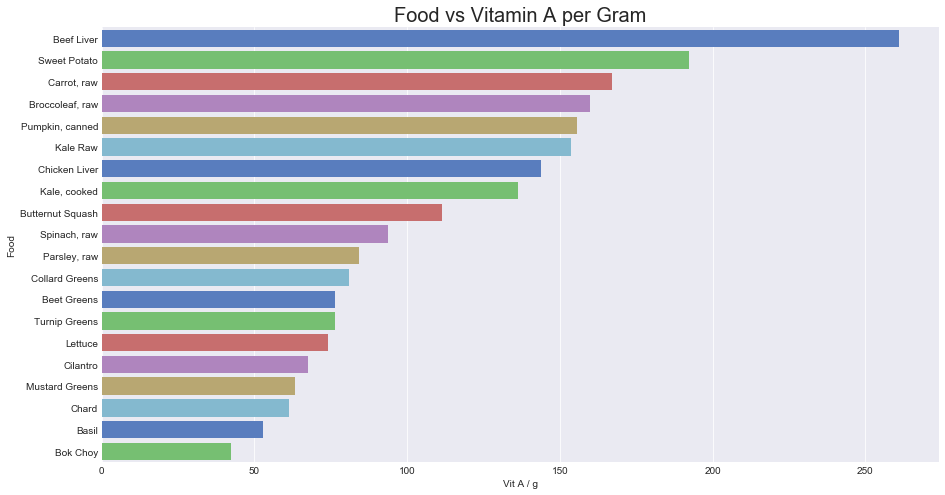

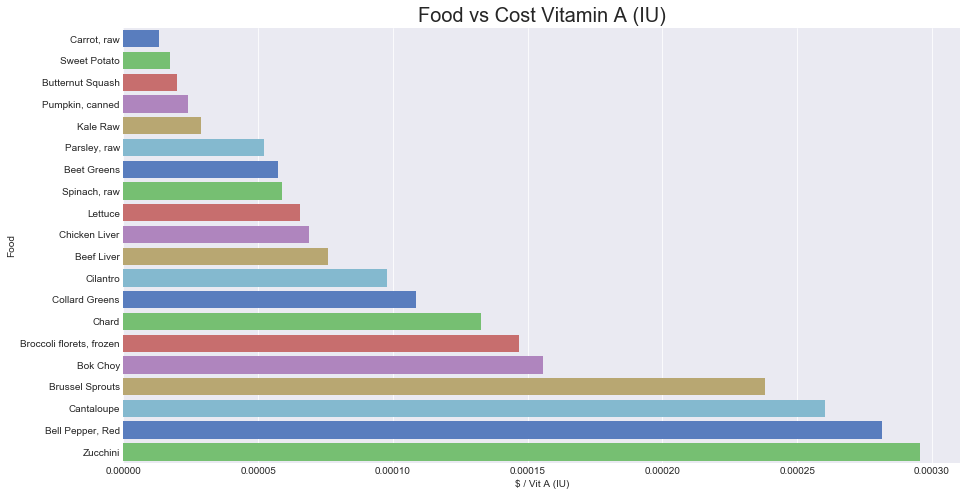

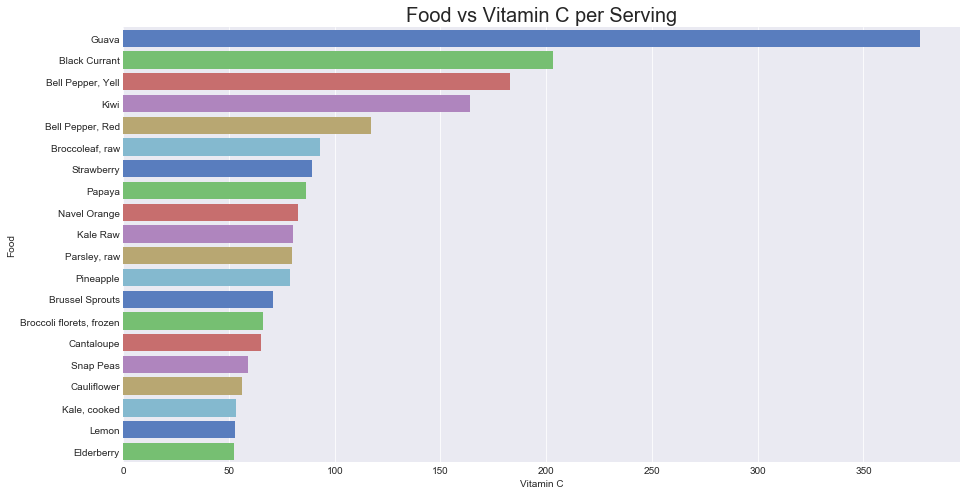

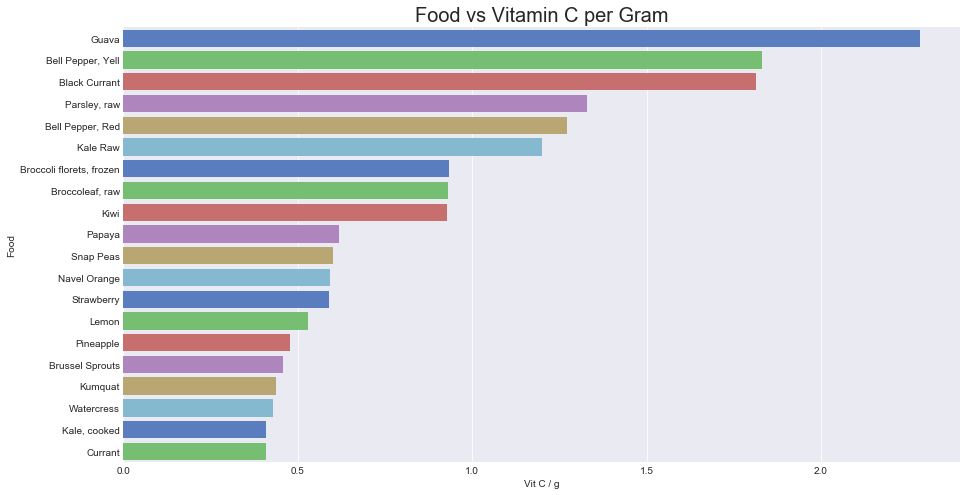

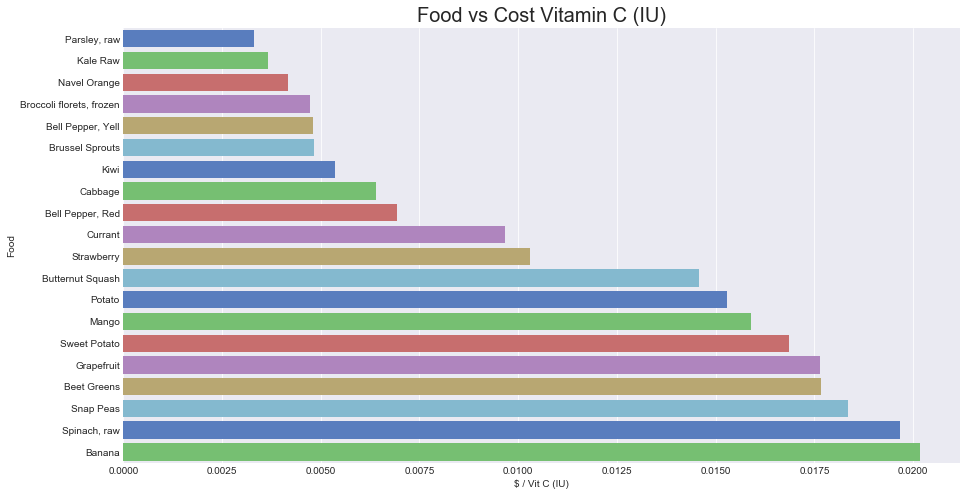

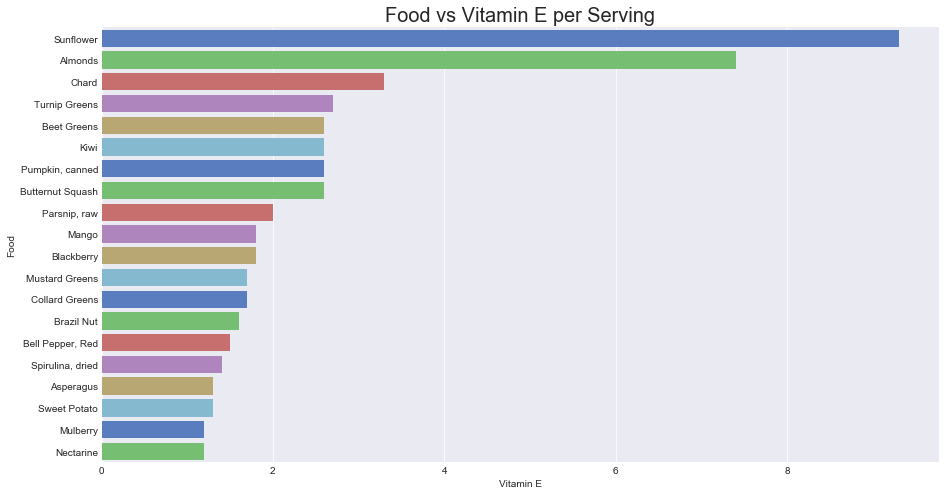

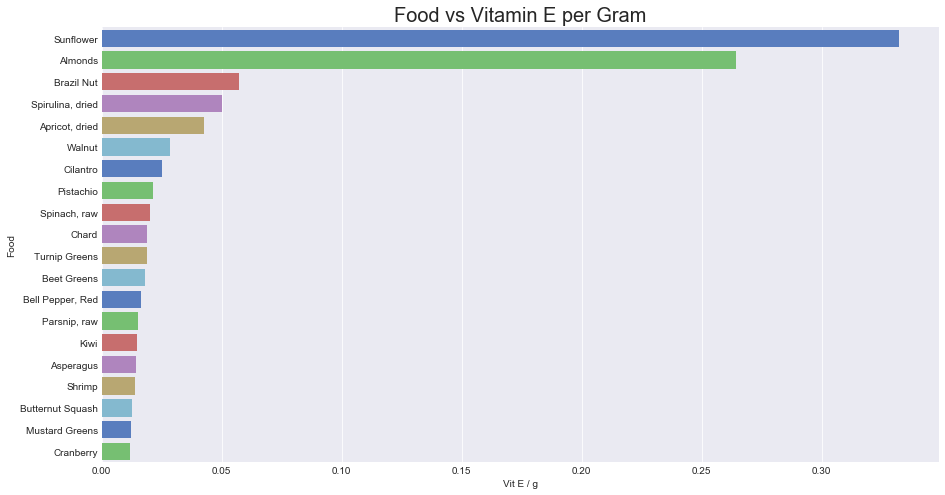

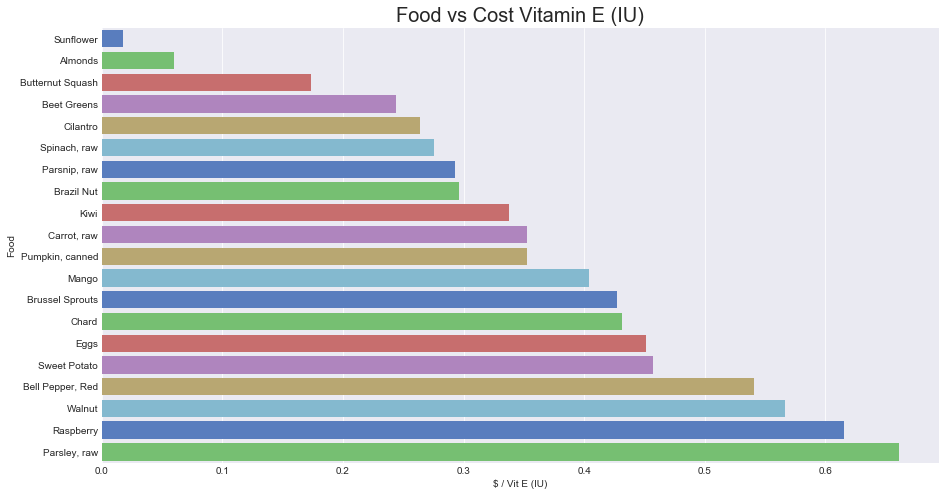

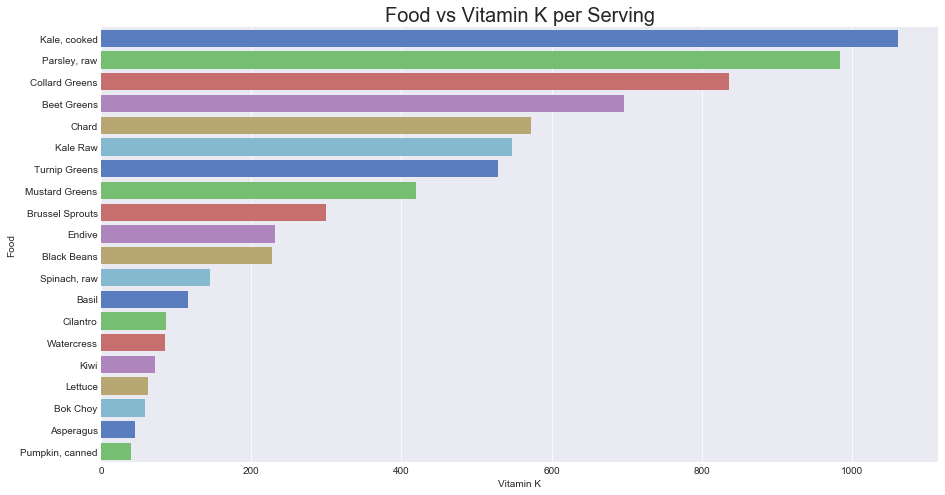

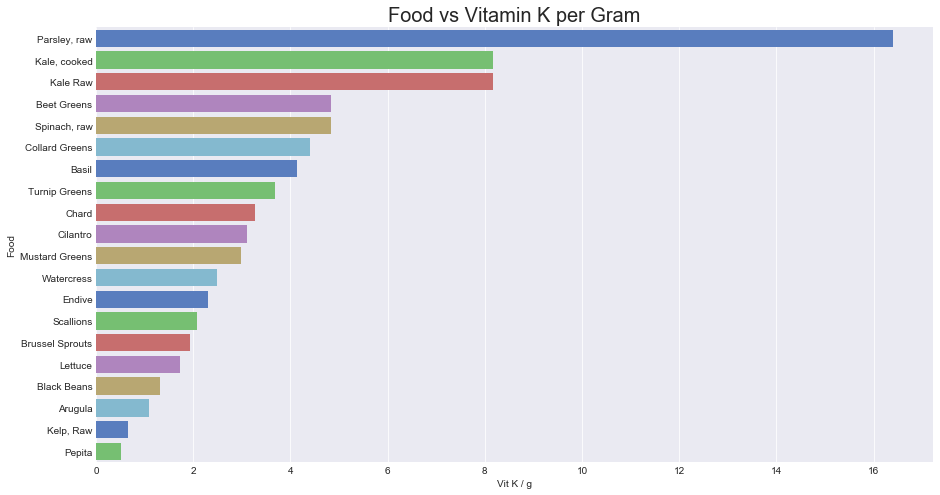

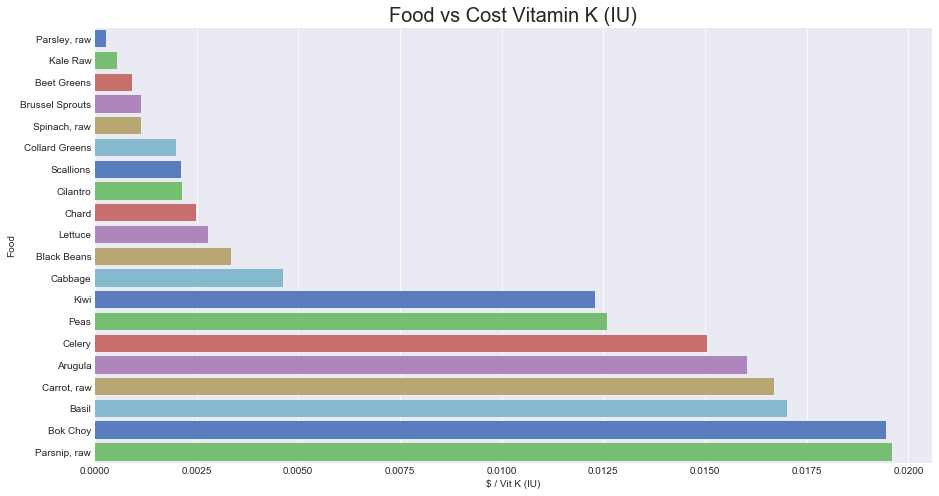

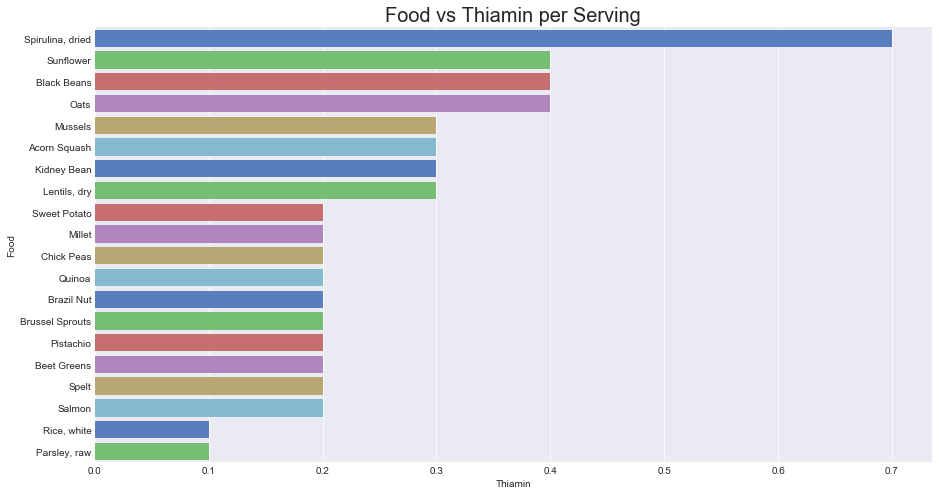

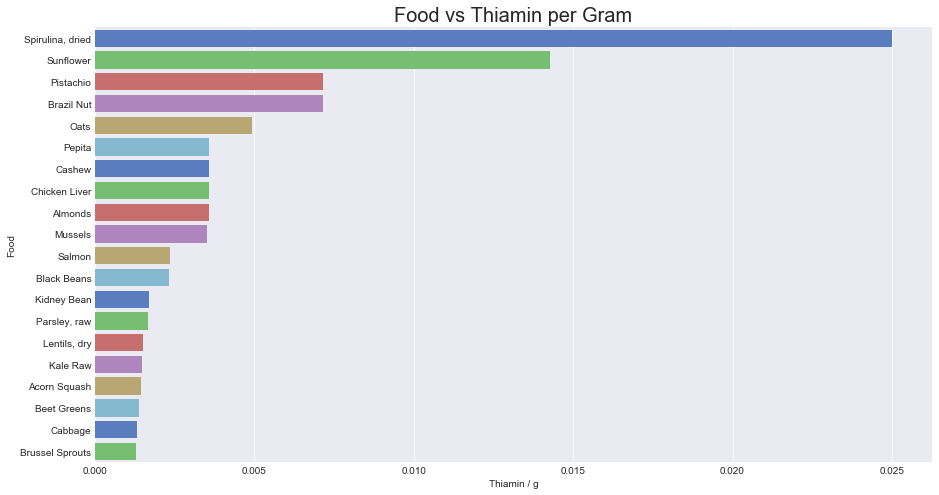

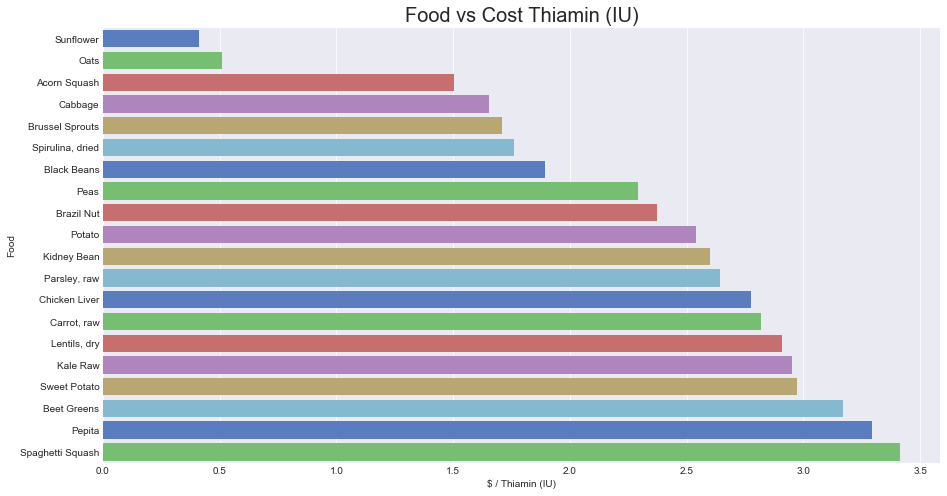

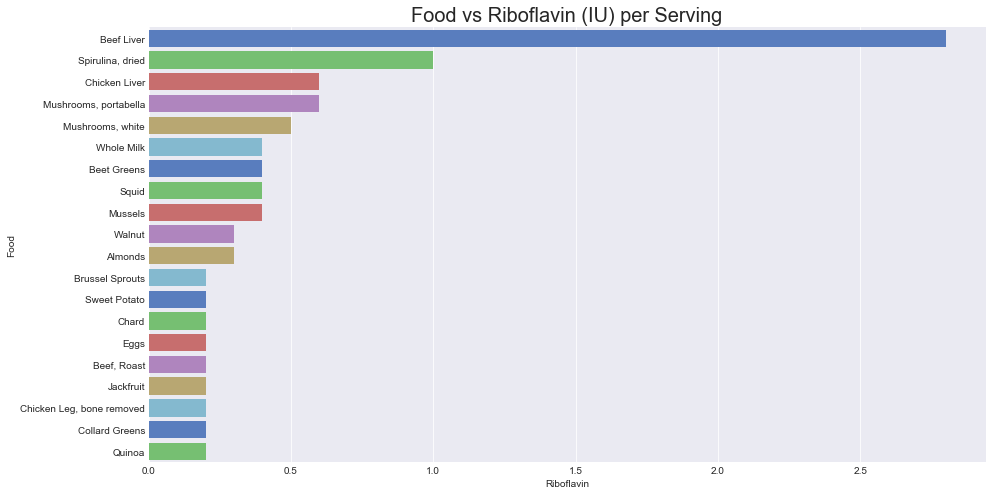

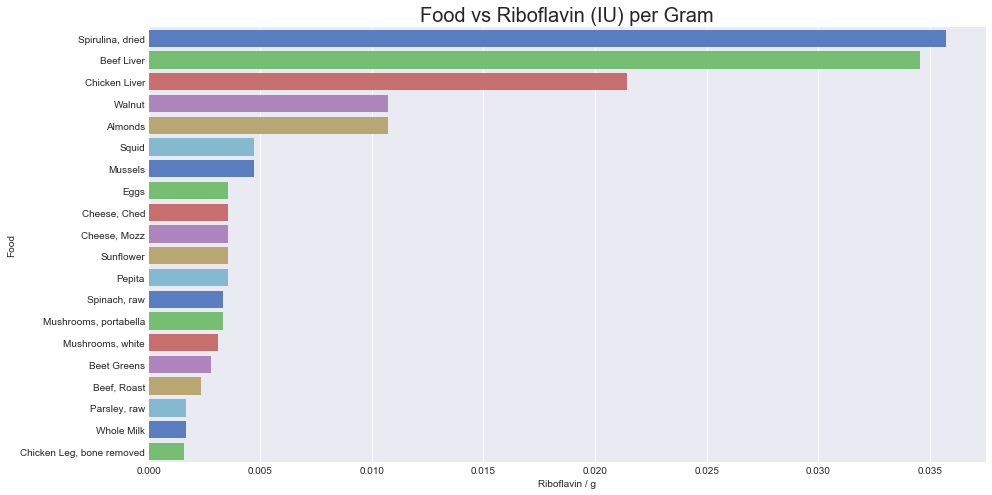

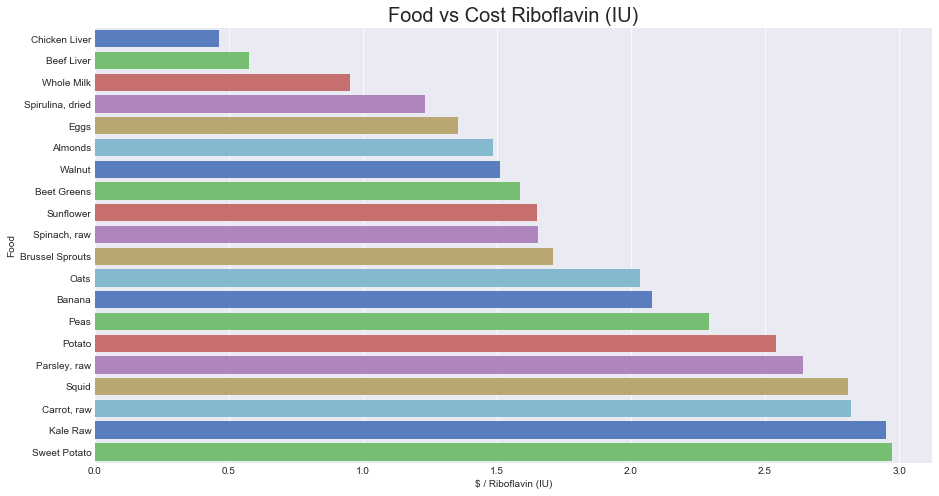

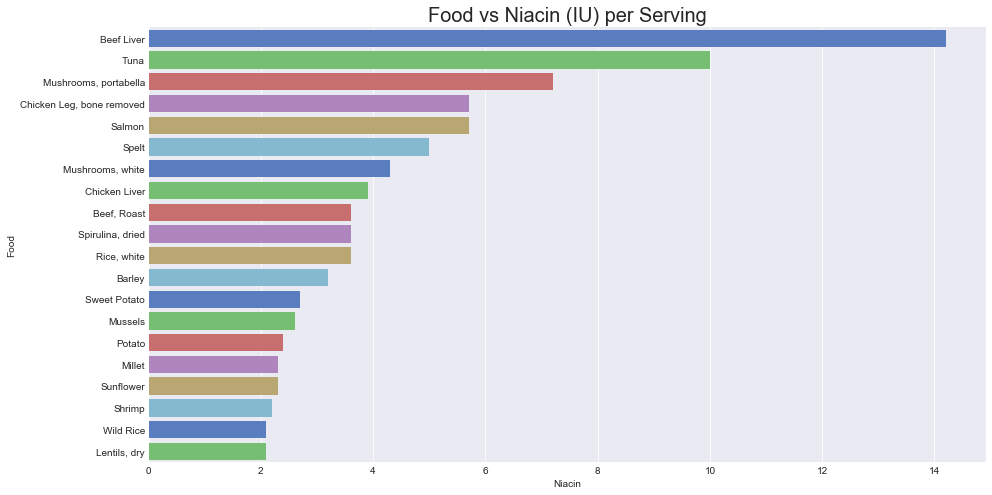

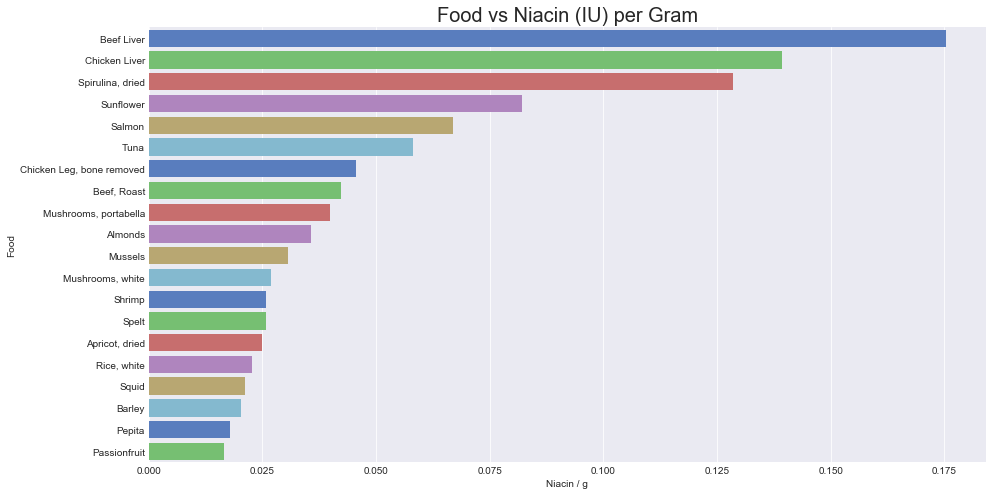

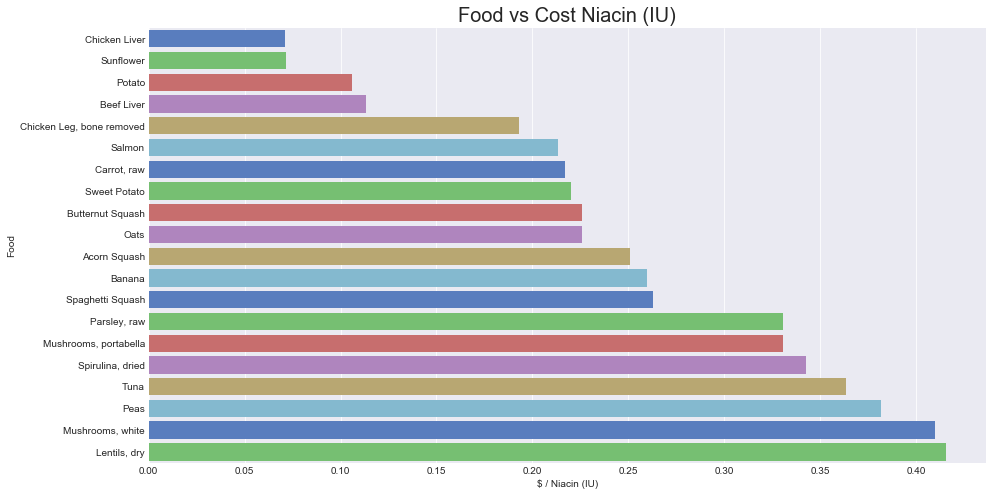

In [1636]:
# From the newly created dataframe matplotlib is used to create visualizations for each nutrient per serving and per gram
# Visualizations also show the cost of each nutrient based on food item and price


# 'Vitamin A',
#  '$ / Vit A (IU)',

df_vita_h = df_cost.sort_values('Vitamin A', ascending = False, na_position='last')
df_vita_h = df_vita_h[:20]
sns.set_style("darkgrid")
cpg_bar = sns.barplot(y=df_vita_h['Food'],
                       x=df_vita_h['Vitamin A'],
                       palette='muted')
plt.title('Food vs Vitamin A per Serving', size = 20)
plt.show()

df_vita_h = df_cost.sort_values('Vit A / g', ascending = False, na_position='last')
df_vita_h = df_vita_h[:20]
sns.set_style("darkgrid")
cpg_bar = sns.barplot(y=df_vita_h['Food'],
                       x=df_vita_h['Vit A / g'],
                       palette='muted')
plt.title('Food vs Vitamin A per Gram', size = 20)
plt.show()


df_vita_cost = df_cost.sort_values('$ / Vit A (IU)', ascending = True, na_position='last')
df_vita_cost = df_vita_cost[:20]
sns.set_style("darkgrid")
cpp_bar = sns.barplot(y=df_vita_cost['Food'],
                       x=df_vita_cost['$ / Vit A (IU)'],
                       palette='muted')
plt.title('Food vs Cost Vitamin A (IU)', size = 20)
plt.show()

#  'Vitamin C',
#  '$ / Vit C (IU)',

df_vitc_h = df_cost.sort_values('Vitamin C', ascending = False, na_position='last')
df_vitc_h = df_vitc_h[:20]
sns.set_style("darkgrid")
cpg_bar = sns.barplot(y=df_vitc_h['Food'],
                       x=df_vitc_h['Vitamin C'],
                       palette='muted')
plt.title('Food vs Vitamin C per Serving', size = 20)
plt.show()


df_vitc_h = df_cost.sort_values('Vit C / g', ascending = False, na_position='last')
df_vitc_h = df_vitc_h[:20]
sns.set_style("darkgrid")
cpg_bar = sns.barplot(y=df_vitc_h['Food'],
                       x=df_vitc_h['Vit C / g'],
                       palette='muted')
plt.title('Food vs Vitamin C per Gram', size = 20)
plt.show()


df_vitc_cost = df_cost.sort_values('$ / Vit C (IU)', ascending = True, na_position='last')
df_vitc_cost = df_vitc_cost[:20]
sns.set_style("darkgrid")
cpp_bar = sns.barplot(y=df_vitc_cost['Food'],
                       x=df_vitc_cost['$ / Vit C (IU)'],
                       palette='muted')
plt.title('Food vs Cost Vitamin C (IU)', size = 20)
plt.show()

#  'Vitamin D',
#  '$ / Vit D (IU)',


#  'Vitamin E',
#  '$ / Vit E (IU)',

df_vite_h = df_cost.sort_values('Vitamin E', ascending = False, na_position='last')
df_vite_h = df_vite_h[:20]
sns.set_style("darkgrid")
cpg_bar = sns.barplot(y=df_vite_h['Food'],
                       x=df_vite_h['Vitamin E'],
                       palette='muted')
plt.title('Food vs Vitamin E per Serving', size = 20)
plt.show()

df_vite_h = df_cost.sort_values('Vit E / g', ascending = False, na_position='last')
df_vite_h = df_vite_h[:20]
sns.set_style("darkgrid")
cpg_bar = sns.barplot(y=df_vite_h['Food'],
                       x=df_vite_h['Vit E / g'],
                       palette='muted')
plt.title('Food vs Vitamin E per Gram', size = 20)
plt.show()


df_vite_cost = df_cost.sort_values('$ / Vit E (IU)', ascending = True, na_position='last')
df_vite_cost = df_vite_cost[:20]
sns.set_style("darkgrid")
cpp_bar = sns.barplot(y=df_vite_cost['Food'],
                       x=df_vite_cost['$ / Vit E (IU)'],
                       palette='muted')
plt.title('Food vs Cost Vitamin E (IU)', size = 20)
plt.show()

#  'Vitamin K',
#  '$ / Vit K (IU)',

df_vitk_h = df_cost.sort_values('Vitamin K', ascending = False, na_position='last')
df_vitk_h = df_vitk_h[:20]
sns.set_style("darkgrid")
cpg_bar = sns.barplot(y=df_vitk_h['Food'],
                       x=df_vitk_h['Vitamin K'],
                       palette='muted')
plt.title('Food vs Vitamin K per Serving', size = 20)
plt.show()


df_vitk_h = df_cost.sort_values('Vit K / g', ascending = False, na_position='last')
df_vitk_h = df_vitk_h[:20]
sns.set_style("darkgrid")
cpg_bar = sns.barplot(y=df_vitk_h['Food'],
                       x=df_vitk_h['Vit K / g'],
                       palette='muted')
plt.title('Food vs Vitamin K per Gram', size = 20)
plt.show()


df_vitk_cost = df_cost.sort_values('$ / Vit K (IU)', ascending = True, na_position='last')
df_vitk_cost = df_vitk_cost[:20]
sns.set_style("darkgrid")
cpp_bar = sns.barplot(y=df_vitk_cost['Food'],
                       x=df_vitk_cost['$ / Vit K (IU)'],
                       palette='muted')
plt.title('Food vs Cost Vitamin K (IU)', size = 20)
plt.show()


#  'Thiamin',
#  '$ / Thiamin (IU)',

df_thiamin_h = df_cost.sort_values('Thiamin', ascending = False, na_position='last')
df_thiamin_h = df_thiamin_h[:20]
sns.set_style("darkgrid")
cpg_bar = sns.barplot(y=df_thiamin_h['Food'],
                       x=df_thiamin_h['Thiamin'],
                       palette='muted')
plt.title('Food vs Thiamin per Serving', size = 20)
plt.show()


df_thiamin_h = df_cost.sort_values('Thiamin / g', ascending = False, na_position='last')
df_thiamin_h = df_thiamin_h[:20]
sns.set_style("darkgrid")
cpg_bar = sns.barplot(y=df_thiamin_h['Food'],
                       x=df_thiamin_h['Thiamin / g'],
                       palette='muted')
plt.title('Food vs Thiamin per Gram', size = 20)
plt.show()


df_thiamin_cost = df_cost.sort_values('$ / Thiamin (IU)', ascending = True, na_position='last')
df_thiamin_cost = df_thiamin_cost[:20]
sns.set_style("darkgrid")
cpp_bar = sns.barplot(y=df_thiamin_cost['Food'],
                       x=df_thiamin_cost['$ / Thiamin (IU)'],
                       palette='muted')
plt.title('Food vs Cost Thiamin (IU)', size = 20)
plt.show()

#  'Riboflavin',
#  '$ / Riboflavin (IU)',

df_riboflavin_h = df_cost.sort_values('Riboflavin', ascending = False, na_position='last')
df_riboflavin_h = df_riboflavin_h[:20]
sns.set_style("darkgrid")
cpg_bar = sns.barplot(y=df_riboflavin_h['Food'],
                       x=df_riboflavin_h['Riboflavin'],
                       palette='muted')
plt.title('Food vs Riboflavin (IU) per Serving', size = 20)
plt.show()


df_riboflavin_h = df_cost.sort_values('Riboflavin / g', ascending = False, na_position='last')
df_riboflavin_h = df_riboflavin_h[:20]
sns.set_style("darkgrid")
cpg_bar = sns.barplot(y=df_riboflavin_h['Food'],
                       x=df_riboflavin_h['Riboflavin / g'],
                       palette='muted')
plt.title('Food vs Riboflavin (IU) per Gram', size = 20)
plt.show()


df_riboflavin_cost = df_cost.sort_values('$ / Riboflavin (IU)', ascending = True, na_position='last')
df_riboflavin_cost = df_riboflavin_cost[:20]
sns.set_style("darkgrid")
cpp_bar = sns.barplot(y=df_riboflavin_cost['Food'],
                       x=df_riboflavin_cost['$ / Riboflavin (IU)'],
                       palette='muted')
plt.title('Food vs Cost Riboflavin (IU)', size = 20)
plt.show()

#  'Niacin',
#  '$ / Niacin (IU)',

df_niacin_h = df_cost.sort_values('Niacin', ascending = False, na_position='last')
df_niacin_h = df_niacin_h[:20]
sns.set_style("darkgrid")
cpg_bar = sns.barplot(y=df_niacin_h['Food'],
                       x=df_niacin_h['Niacin'],
                       palette='muted')
plt.title('Food vs Niacin (IU) per Serving', size = 20)
plt.show()

df_niacin_h = df_cost.sort_values('Niacin / g', ascending = False, na_position='last')
df_niacin_h = df_niacin_h[:20]
sns.set_style("darkgrid")
cpg_bar = sns.barplot(y=df_niacin_h['Food'],
                       x=df_niacin_h['Niacin / g'],
                       palette='muted')
plt.title('Food vs Niacin (IU) per Gram', size = 20)
plt.show()


df_niacin_cost = df_cost.sort_values('$ / Niacin (IU)', ascending = True, na_position='last')
df_niacin_cost = df_niacin_cost[:20]
sns.set_style("darkgrid")
cpp_bar = sns.barplot(y=df_niacin_cost['Food'],
                       x=df_niacin_cost['$ / Niacin (IU)'],
                       palette='muted')
plt.title('Food vs Cost Niacin (IU)', size = 20)
plt.show()

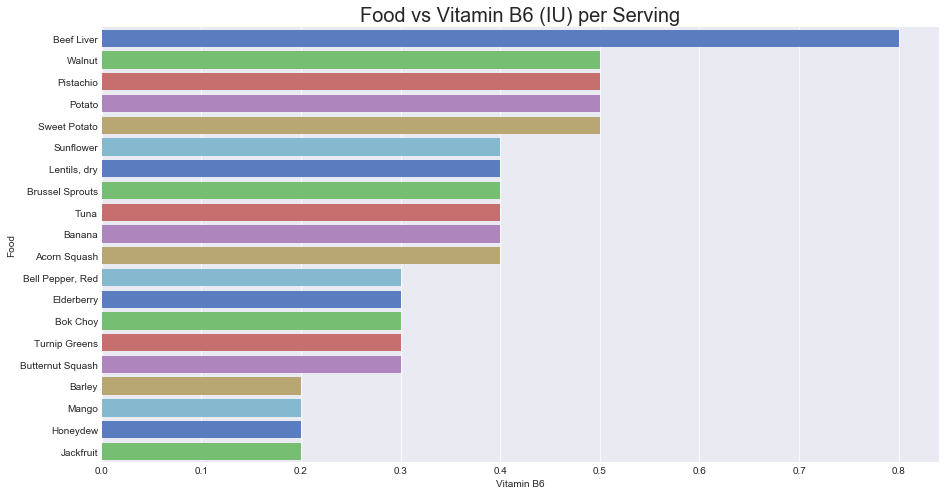

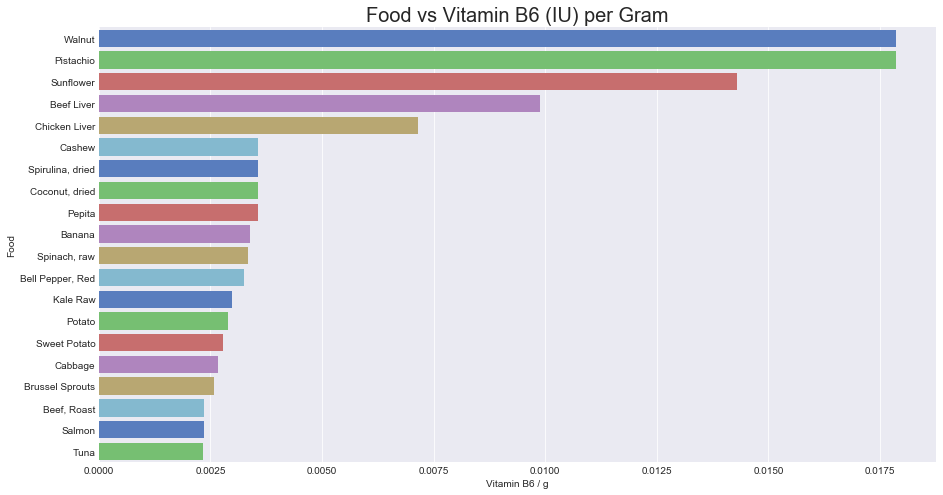

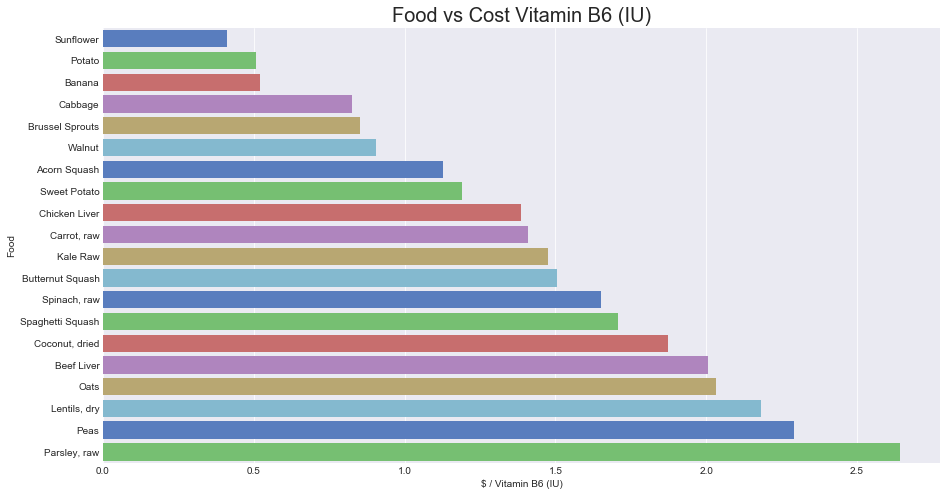

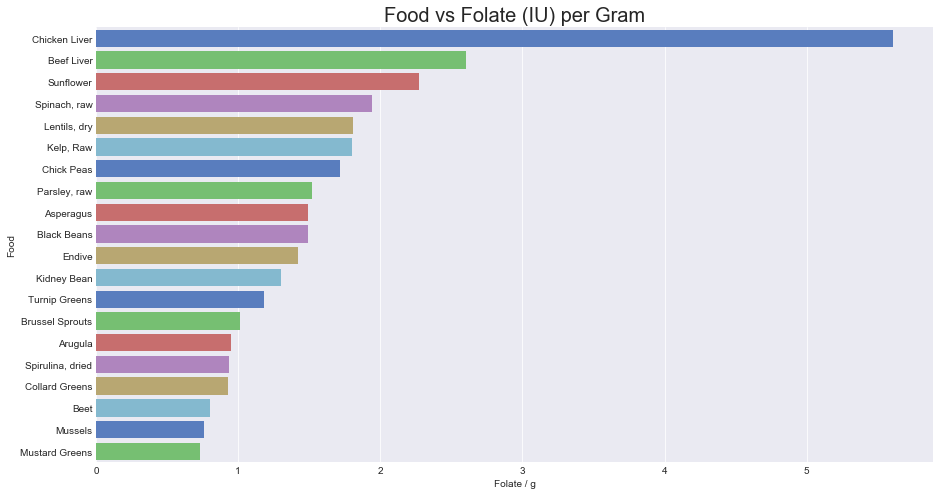

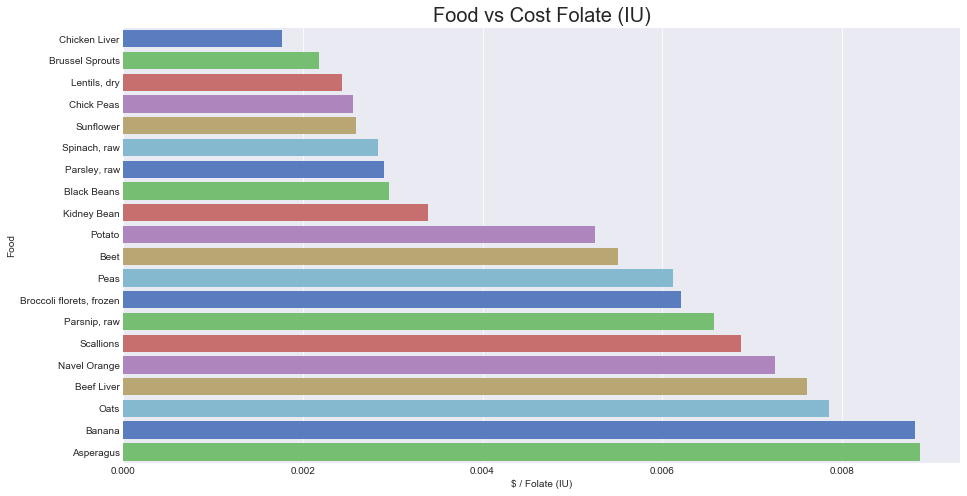

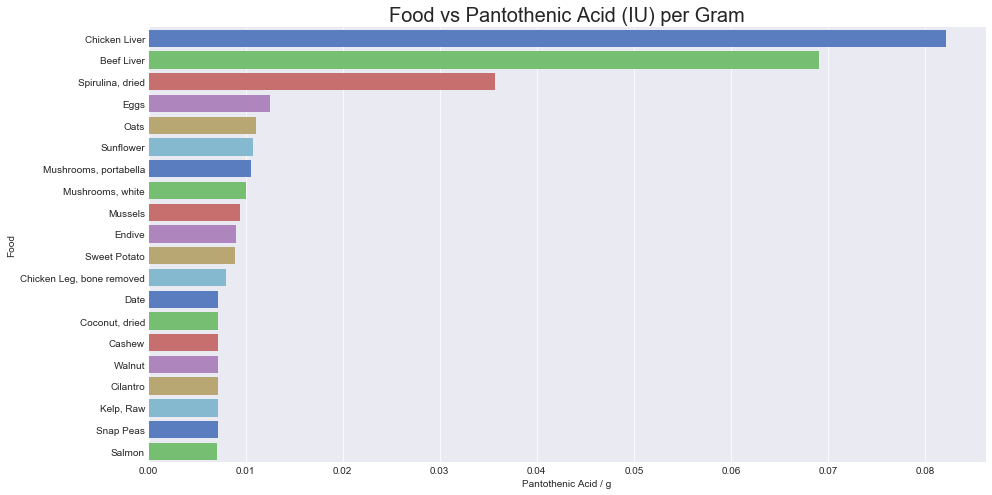

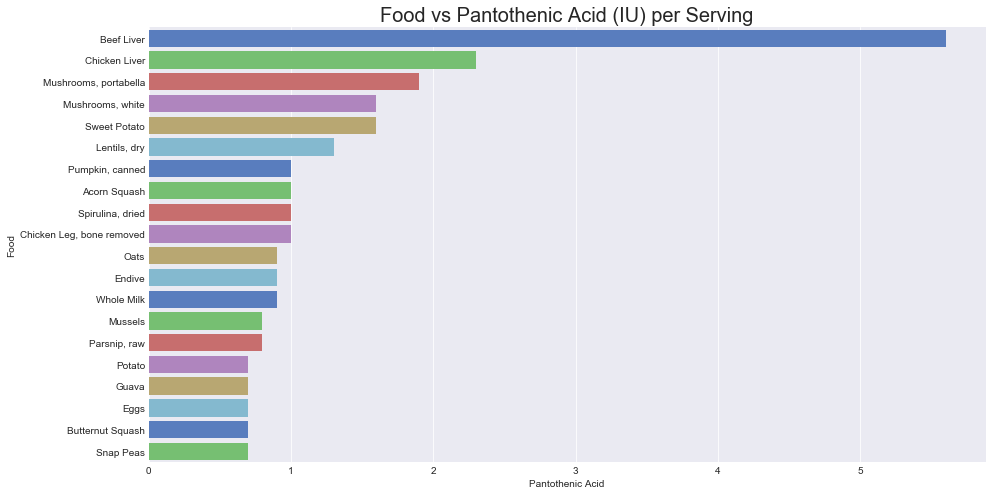

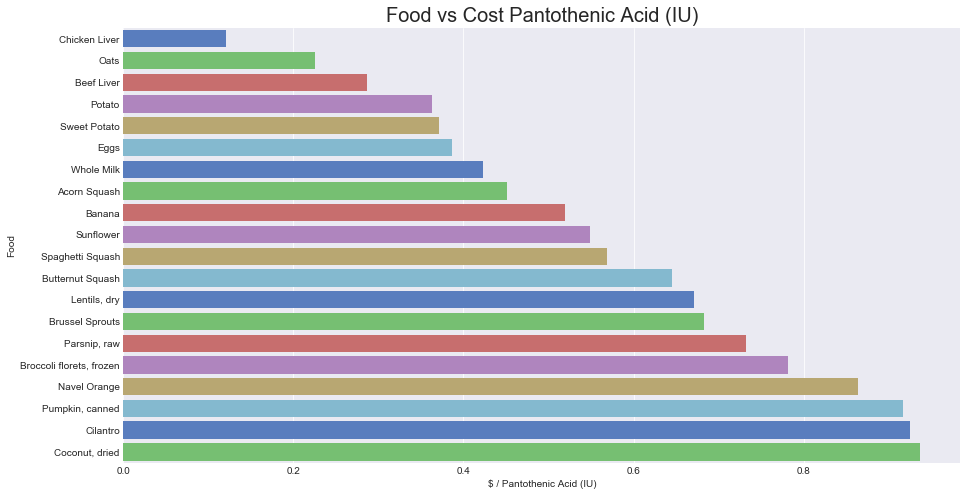

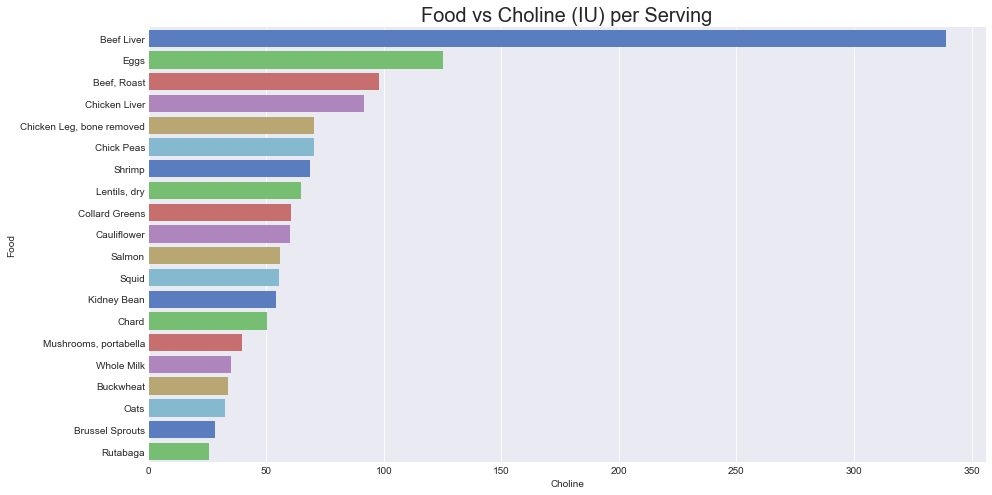

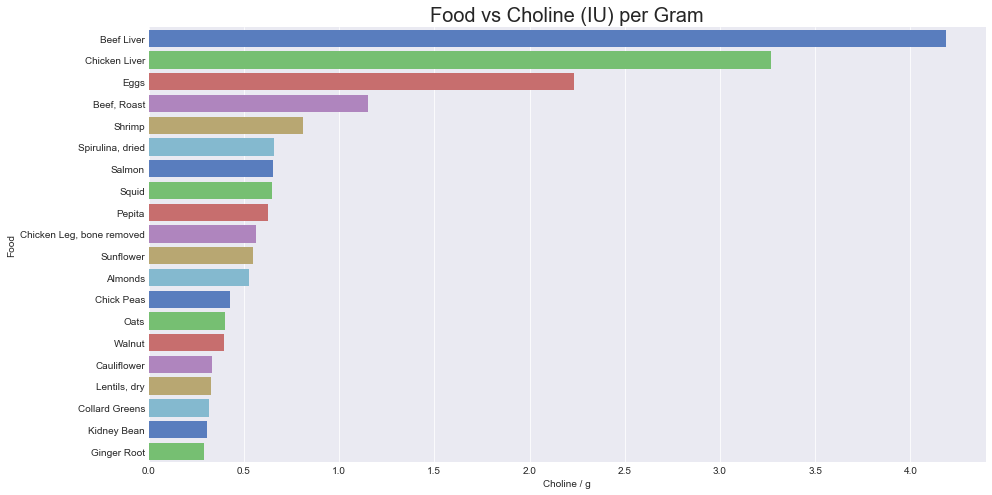

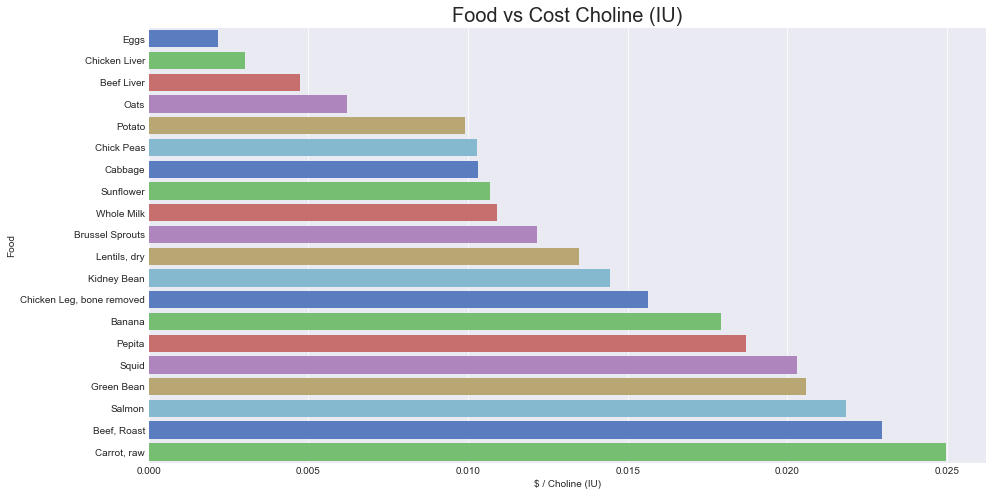

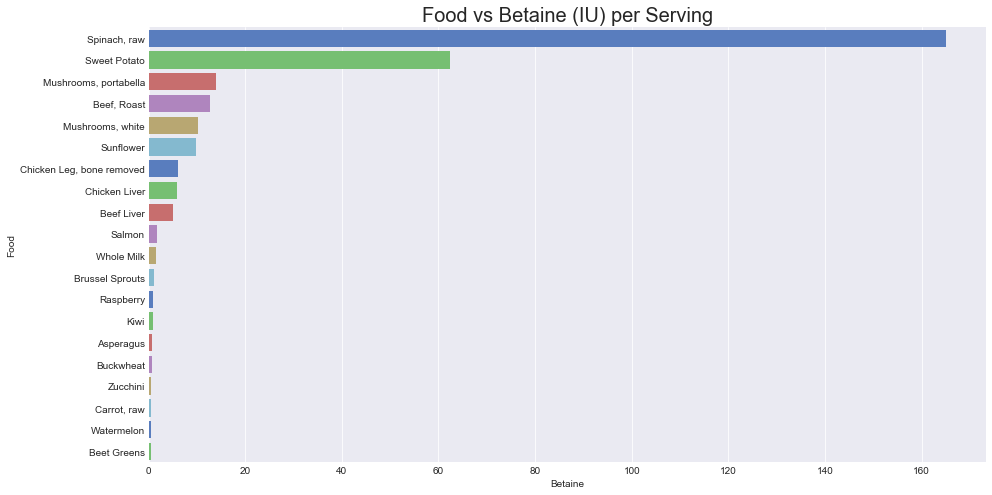

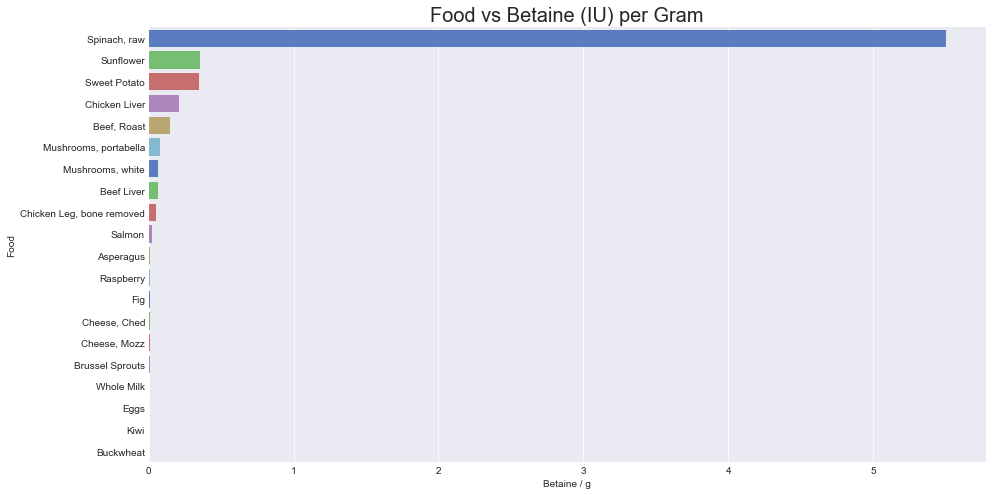

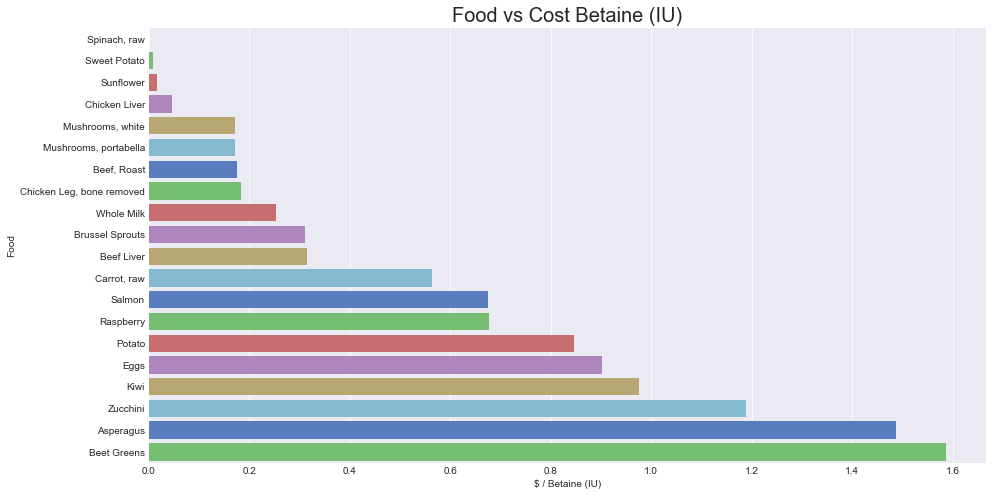

In [1641]:
# Vitamin B6',
#  '$ / Vitamin B6 (IU)',

df_vitb6_h = df_cost.sort_values('Vitamin B6', ascending = False, na_position='last')
df_vitb6_h = df_vitb6_h[:20]
sns.set_style("darkgrid")
cpg_bar = sns.barplot(y=df_vitb6_h['Food'],
                       x=df_vitb6_h['Vitamin B6'],
                       palette='muted')
plt.title('Food vs Vitamin B6 (IU) per Serving', size = 20)
plt.show()

df_vitb6_h = df_cost.sort_values('Vitamin B6 / g', ascending = False, na_position='last')
df_vitb6_h = df_vitb6_h[:20]
sns.set_style("darkgrid")
cpg_bar = sns.barplot(y=df_vitb6_h['Food'],
                       x=df_vitb6_h['Vitamin B6 / g'],
                       palette='muted')
plt.title('Food vs Vitamin B6 (IU) per Gram', size = 20)
plt.show()


df_vitb6_cost = df_cost.sort_values('$ / Vitamin B6 (IU)', ascending = True, na_position='last')
df_vitb6_cost = df_vitb6_cost[:20]
sns.set_style("darkgrid")
cpp_bar = sns.barplot(y=df_vitb6_cost['Food'],
                       x=df_vitb6_cost['$ / Vitamin B6 (IU)'],
                       palette='muted')
plt.title('Food vs Cost Vitamin B6 (IU)', size = 20)
plt.show()

#  'Folate',
#  '$ / Folate (IU)',
#  0,

df_folate_h = df_cost.sort_values('Folate / g', ascending = False, na_position='last')
df_folate_h = df_folate_h[:20]
sns.set_style("darkgrid")
cpg_bar = sns.barplot(y=df_folate_h['Food'],
                       x=df_folate_h['Folate / g'],
                       palette='muted')
plt.title('Food vs Folate (IU) per Gram', size = 20)
plt.show()


df_folate_cost = df_cost.sort_values('$ / Folate (IU)', ascending = True, na_position='last')
df_folate_cost = df_folate_cost[:20]
sns.set_style("darkgrid")
cpp_bar = sns.barplot(y=df_folate_cost['Food'],
                       x=df_folate_cost['$ / Folate (IU)'],
                       palette='muted')
plt.title('Food vs Cost Folate (IU)', size = 20)
plt.show()

#  'Pantothenic Acid',
#  'Pantothenic Acid / g',
#  '$ / Pantothenic Acid (IU)',

df_pa_h = df_cost.sort_values('Pantothenic Acid / g', ascending = False, na_position='last')
df_pa_h = df_pa_h[:20]
sns.set_style("darkgrid")
cpg_bar = sns.barplot(y=df_pa_h['Food'],
                       x=df_pa_h['Pantothenic Acid / g'],
                       palette='muted')
plt.title('Food vs Pantothenic Acid (IU) per Gram', size = 20)
plt.show()


df_pa_h = df_cost.sort_values('Pantothenic Acid', ascending = False, na_position='last')
df_pa_h = df_pa_h[:20]
sns.set_style("darkgrid")
cpg_bar = sns.barplot(y=df_pa_h['Food'],
                       x=df_pa_h['Pantothenic Acid'],
                       palette='muted')
plt.title('Food vs Pantothenic Acid (IU) per Serving', size = 20)
plt.show()

df_pa_cost = df_cost.sort_values('$ / Pantothenic Acid (IU)', ascending = True, na_position='last')
df_pa_cost = df_pa_cost[:20]
sns.set_style("darkgrid")
cpp_bar = sns.barplot(y=df_pa_cost['Food'],
                       x=df_pa_cost['$ / Pantothenic Acid (IU)'],
                       palette='muted')
plt.title('Food vs Cost Pantothenic Acid (IU)', size = 20)
plt.show()


#  'Choline',
#  'Choline / g',
#  '$ / Choline (IU)',

df_choline_h = df_cost.sort_values('Choline', ascending = False, na_position='last')
df_choline_h = df_choline_h[:20]
sns.set_style("darkgrid")
cpg_bar = sns.barplot(y=df_choline_h['Food'],
                       x=df_choline_h['Choline'],
                       palette='muted')
plt.title('Food vs Choline (IU) per Serving', size = 20)
plt.show()


df_choline_h = df_cost.sort_values('Choline / g', ascending = False, na_position='last')
df_choline_h = df_choline_h[:20]
sns.set_style("darkgrid")
cpg_bar = sns.barplot(y=df_choline_h['Food'],
                       x=df_choline_h['Choline / g'],
                       palette='muted')
plt.title('Food vs Choline (IU) per Gram', size = 20)
plt.show()


df_choline_cost = df_cost.sort_values('$ / Choline (IU)', ascending = True, na_position='last')
df_choline_cost = df_choline_cost[:20]
sns.set_style("darkgrid")
cpp_bar = sns.barplot(y=df_choline_cost['Food'],
                       x=df_choline_cost['$ / Choline (IU)'],
                       palette='muted')
plt.title('Food vs Cost Choline (IU)', size = 20)
plt.show()

#  'Betaine',
#  'Betaine / g',
#  '$ / Betaine (IU)',

df_betaine_h = df_cost.sort_values('Betaine', ascending = False, na_position='last')
df_betaine_h = df_betaine_h[:20]
sns.set_style("darkgrid")
cpg_bar = sns.barplot(y=df_betaine_h['Food'],
                       x=df_betaine_h['Betaine'],
                       palette='muted')
plt.title('Food vs Betaine (IU) per Serving', size = 20)
plt.show()


df_betaine_h = df_cost.sort_values('Betaine / g', ascending = False, na_position='last')
df_betaine_h = df_betaine_h[:20]
sns.set_style("darkgrid")
cpg_bar = sns.barplot(y=df_betaine_h['Food'],
                       x=df_betaine_h['Betaine / g'],
                       palette='muted')
plt.title('Food vs Betaine (IU) per Gram', size = 20)
plt.show()

df_betaine_cost = df_cost.sort_values('$ / Betaine (IU)', ascending = True, na_position='last')
df_betaine_cost = df_betaine_cost[:20]
sns.set_style("darkgrid")
cpp_bar = sns.barplot(y=df_betaine_cost['Food'],
                       x=df_betaine_cost['$ / Betaine (IU)'],
                       palette='muted')
plt.title('Food vs Cost Betaine (IU)', size = 20)
plt.show()

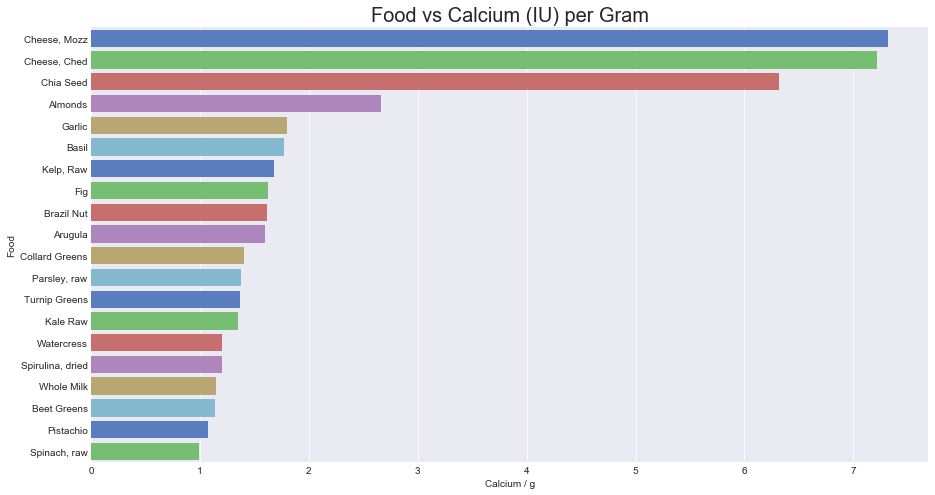

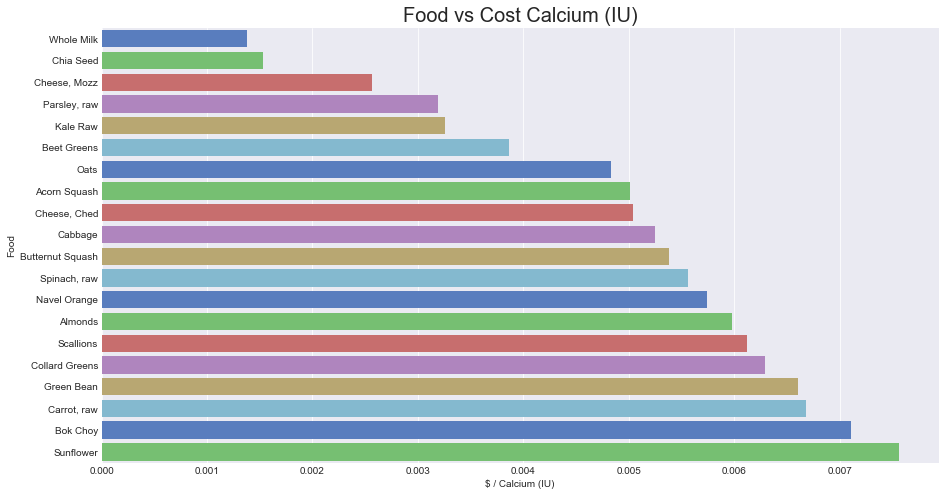

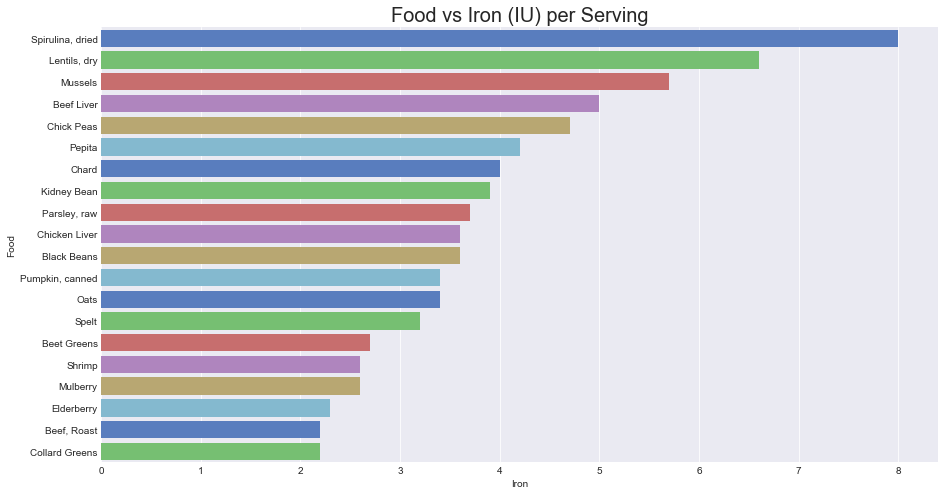

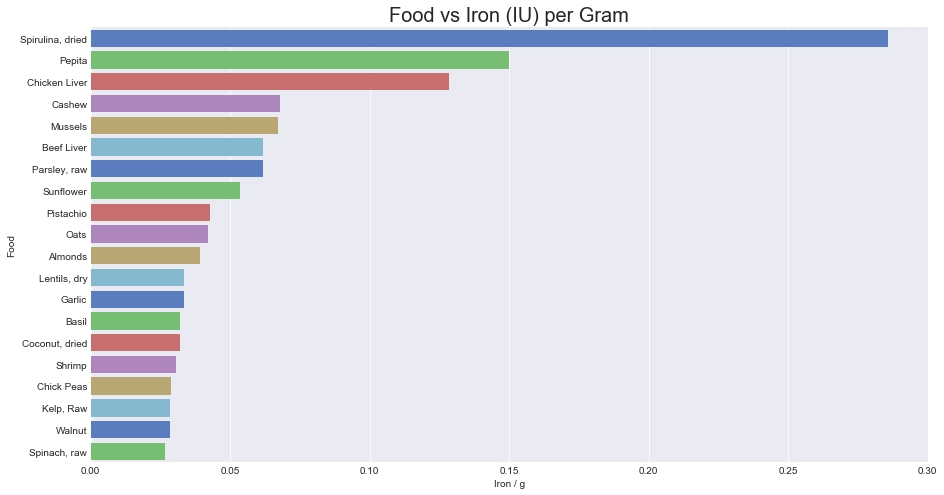

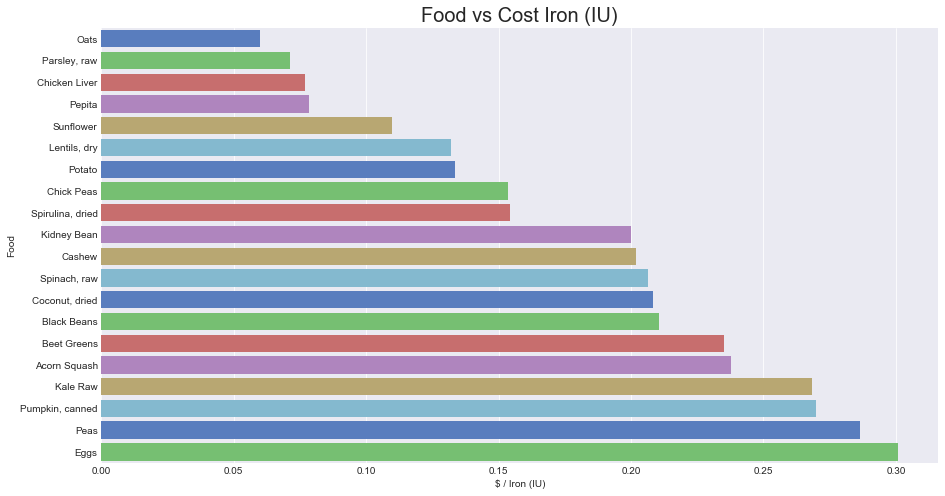

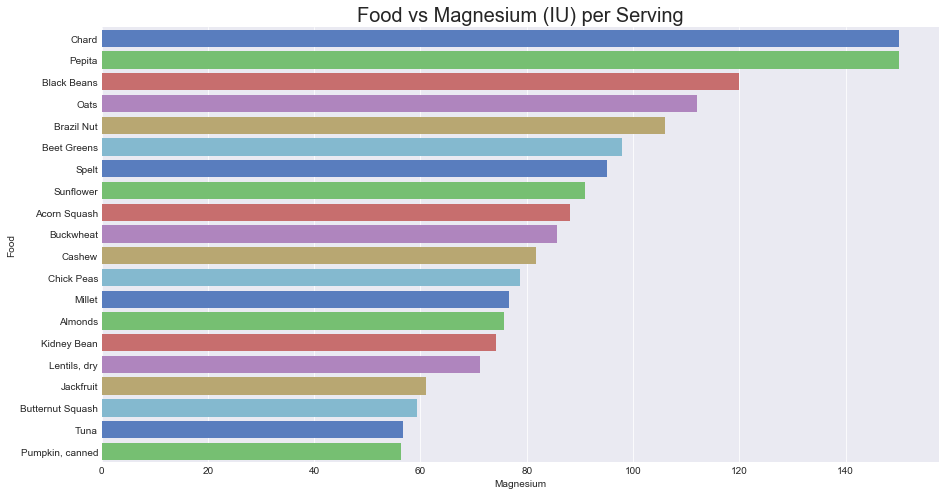

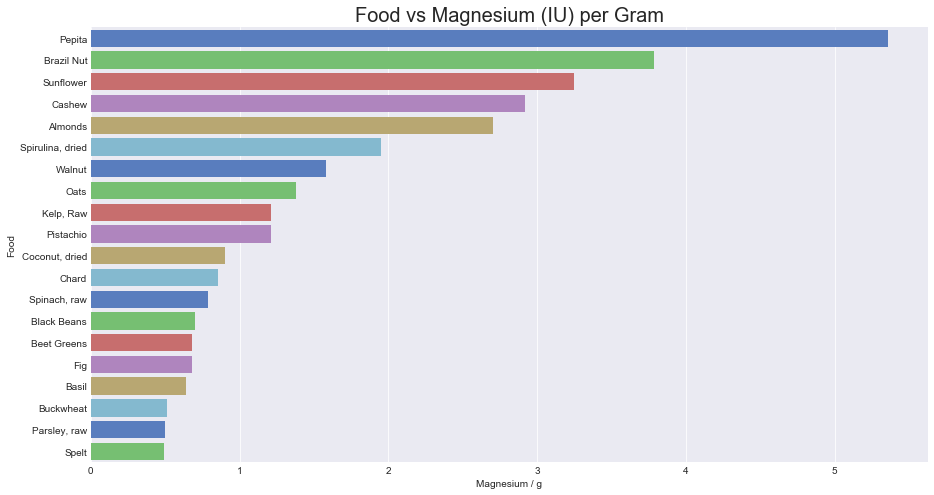

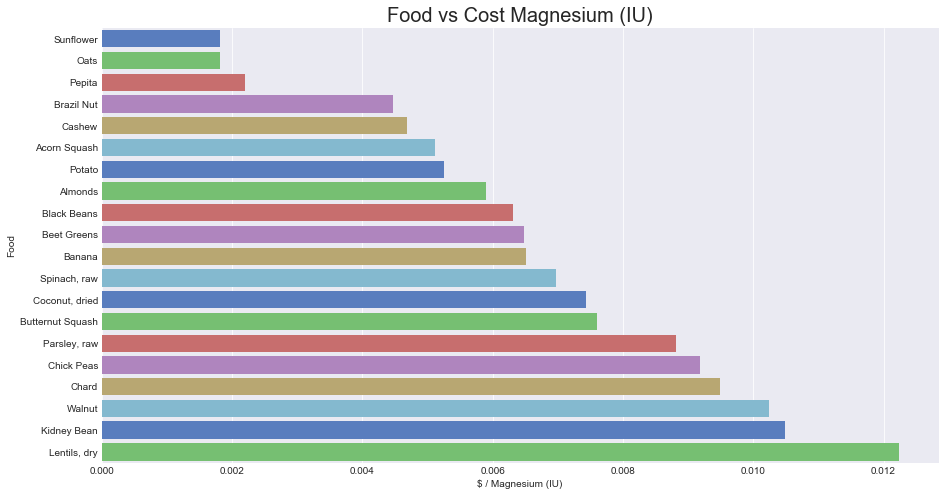

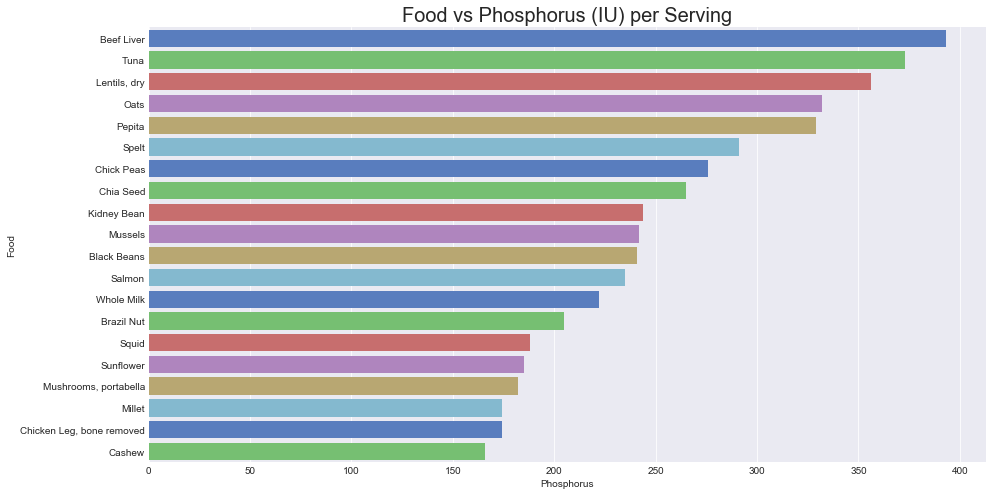

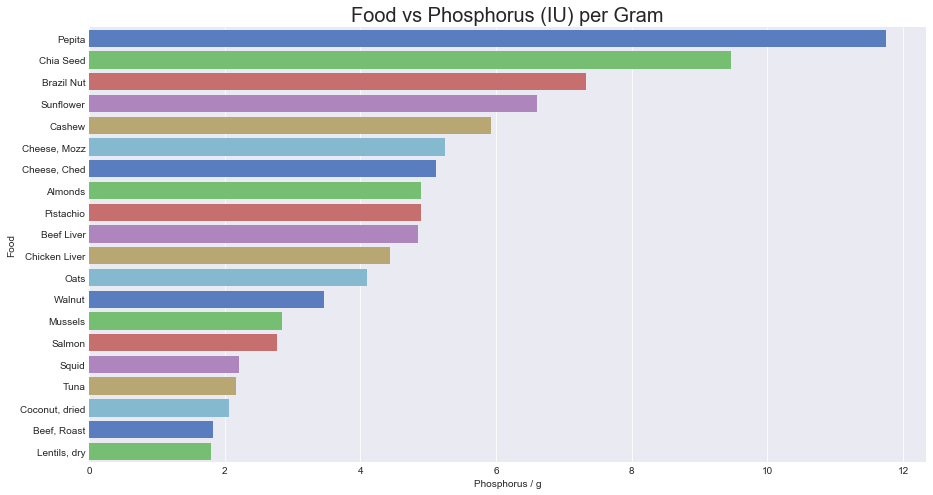

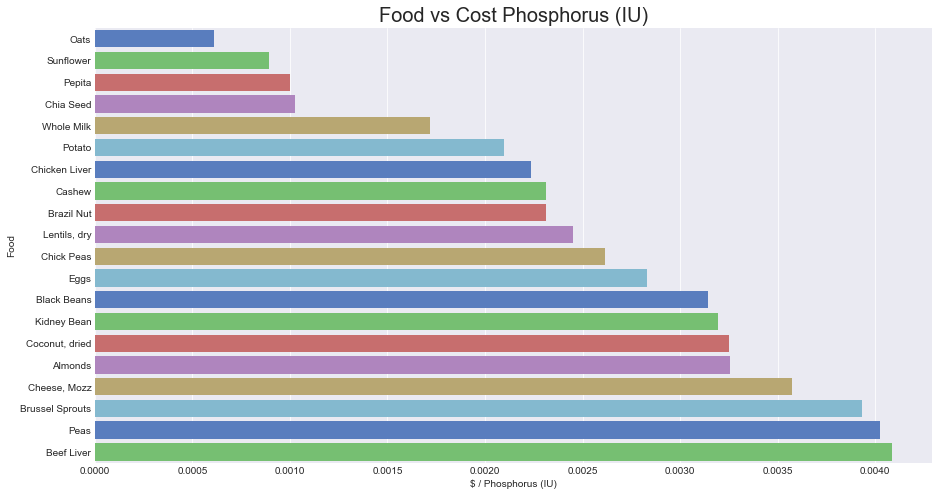

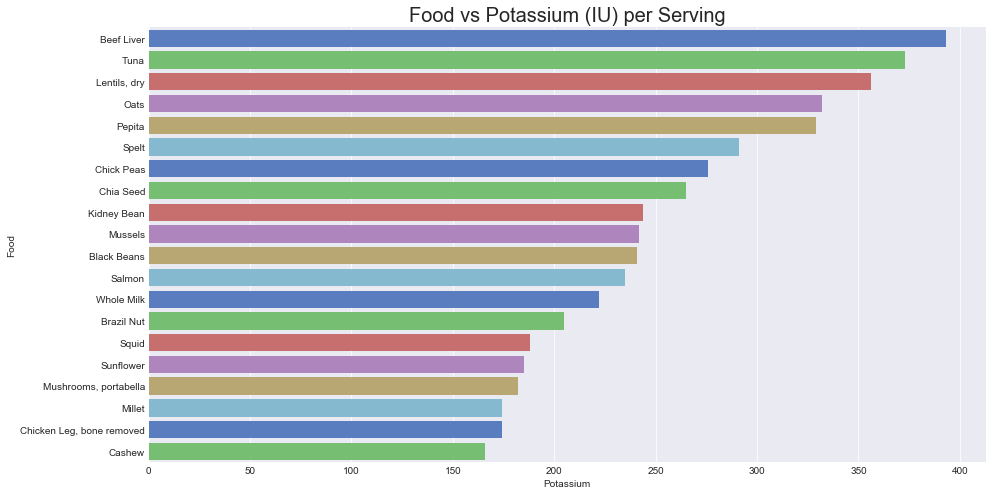

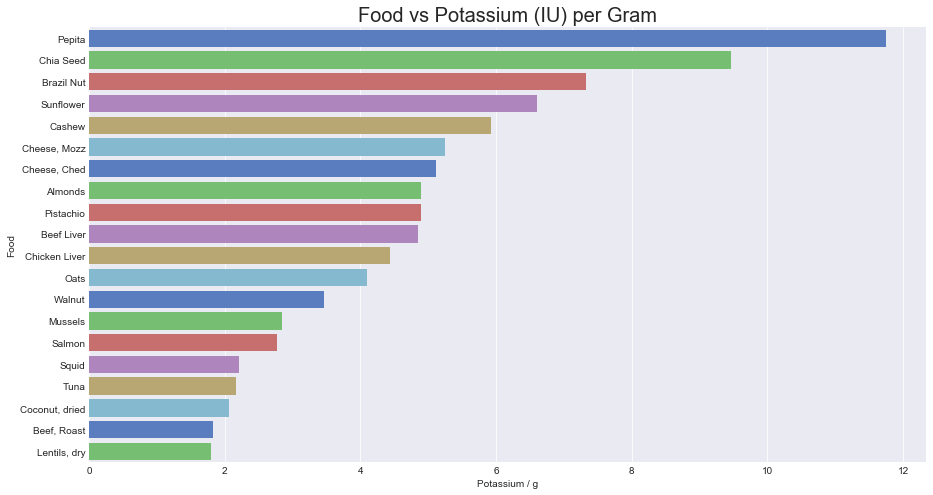

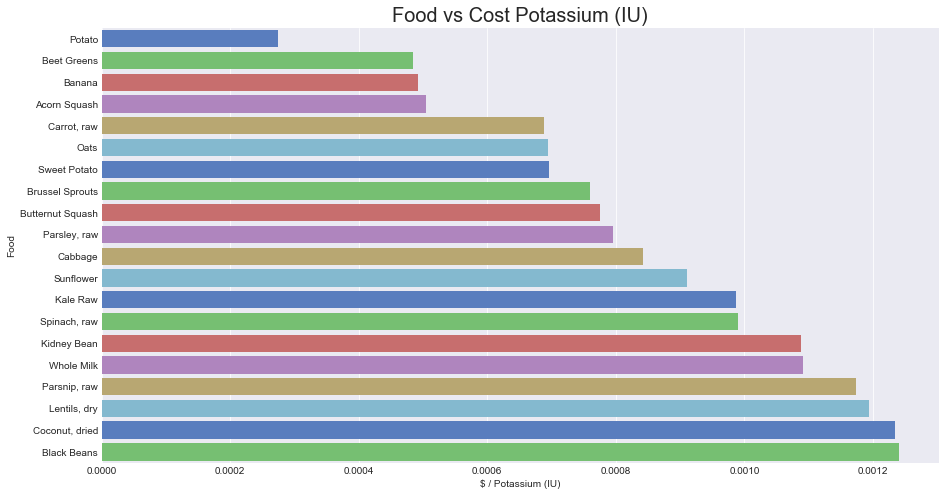

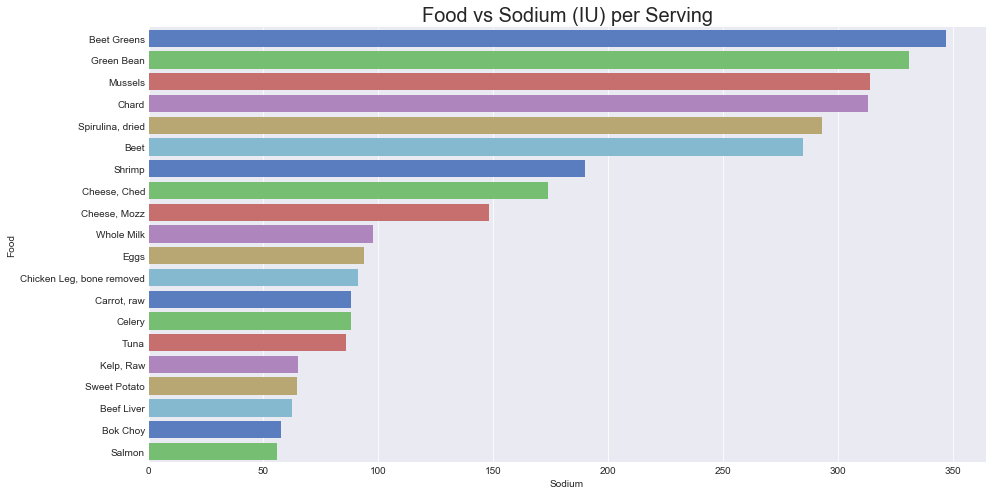

KeyError: 'Sodium /g'

In [1643]:
#  'Calcium',
#  'Calcium / g',
#  '$ / Calcium (IU)',

df_Ca_h = df_cost.sort_values('Calcium / g', ascending = False, na_position='last')
df_Ca_h = df_Ca_h[:20]
sns.set_style("darkgrid")
cpg_bar = sns.barplot(y=df_Ca_h['Food'],
                       x=df_Ca_h['Calcium / g'],
                       palette='muted')
plt.title('Food vs Calcium (IU) per Gram', size = 20)
plt.show()


df_Ca_cost = df_cost.sort_values('$ / Calcium (IU)', ascending = True, na_position='last')
df_Ca_cost = df_Ca_cost[:20]
sns.set_style("darkgrid")
cpp_bar = sns.barplot(y=df_Ca_cost['Food'],
                       x=df_Ca_cost['$ / Calcium (IU)'],
                       palette='muted')
plt.title('Food vs Cost Calcium (IU)', size = 20)
plt.show()

#  'Iron',
#  'Iron / g',
#  '$ / Iron (IU)',

df_Fe_h = df_cost.sort_values('Iron', ascending = False, na_position='last')
df_Fe_h = df_Fe_h[:20]
sns.set_style("darkgrid")
cpg_bar = sns.barplot(y=df_Fe_h['Food'],
                       x=df_Fe_h['Iron'],
                       palette='muted')
plt.title('Food vs Iron (IU) per Serving', size = 20)
plt.show()


df_Fe_h = df_cost.sort_values('Iron / g', ascending = False, na_position='last')
df_Fe_h = df_Fe_h[:20]
sns.set_style("darkgrid")
cpg_bar = sns.barplot(y=df_Fe_h['Food'],
                       x=df_Fe_h['Iron / g'],
                       palette='muted')
plt.title('Food vs Iron (IU) per Gram', size = 20)
plt.show()


df_Fe_cost = df_cost.sort_values('$ / Iron (IU)', ascending = True, na_position='last')
df_Fe_cost = df_Fe_cost[:20]
sns.set_style("darkgrid")
cpp_bar = sns.barplot(y=df_Fe_cost['Food'],
                       x=df_Fe_cost['$ / Iron (IU)'],
                       palette='muted')
plt.title('Food vs Cost Iron (IU)', size = 20)
plt.show()


#  'Magnesium',
#  'Magnesium / g',
#  '$ / Magnesium (IU)',

df_Mg_h = df_cost.sort_values('Magnesium', ascending = False, na_position='last')
df_Mg_h = df_Mg_h[:20]
sns.set_style("darkgrid")
cpg_bar = sns.barplot(y=df_Mg_h['Food'],
                       x=df_Mg_h['Magnesium'],
                       palette='muted')
plt.title('Food vs Magnesium (IU) per Serving', size = 20)
plt.show()


df_Mg_h = df_cost.sort_values('Magnesium / g', ascending = False, na_position='last')
df_Mg_h = df_Mg_h[:20]
sns.set_style("darkgrid")
cpg_bar = sns.barplot(y=df_Mg_h['Food'],
                       x=df_Mg_h['Magnesium / g'],
                       palette='muted')
plt.title('Food vs Magnesium (IU) per Gram', size = 20)
plt.show()


df_Mg_cost = df_cost.sort_values('$ / Magnesium (IU)', ascending = True, na_position='last')
df_Mg_cost = df_Mg_cost[:20]
sns.set_style("darkgrid")
cpp_bar = sns.barplot(y=df_Mg_cost['Food'],
                       x=df_Mg_cost['$ / Magnesium (IU)'],
                       palette='muted')
plt.title('Food vs Cost Magnesium (IU)', size = 20)
plt.show()


#  'Phosphorus',
#  'Phosphorus / g',
#  '$ / Phosphorus (IU)',

df_P_h = df_cost.sort_values('Phosphorus', ascending = False, na_position='last')
df_P_h = df_P_h[:20]
sns.set_style("darkgrid")
cpg_bar = sns.barplot(y=df_P_h['Food'],
                       x=df_P_h['Phosphorus'],
                       palette='muted')
plt.title('Food vs Phosphorus (IU) per Serving', size = 20)
plt.show()


df_P_h = df_cost.sort_values('Phosphorus / g', ascending = False, na_position='last')
df_P_h = df_P_h[:20]
sns.set_style("darkgrid")
cpg_bar = sns.barplot(y=df_P_h['Food'],
                       x=df_P_h['Phosphorus / g'],
                       palette='muted')
plt.title('Food vs Phosphorus (IU) per Gram', size = 20)
plt.show()


df_P_cost = df_cost.sort_values('$ / Phosphorus (IU)', ascending = True, na_position='last')
df_P_cost = df_P_cost[:20]
sns.set_style("darkgrid")
cpp_bar = sns.barplot(y=df_P_cost['Food'],
                       x=df_P_cost['$ / Phosphorus (IU)'],
                       palette='muted')
plt.title('Food vs Cost Phosphorus (IU)', size = 20)
plt.show()


#  'Potassium',
#  'Potassium / g',
#  '$ / Potassium (IU)',

df_K_h = df_cost.sort_values('Potassium', ascending = False, na_position='last')
df_K_h = df_K_h[:20]
sns.set_style("darkgrid")
cpg_bar = sns.barplot(y=df_K_h['Food'],
                       x=df_K_h['Potassium'],
                       palette='muted')
plt.title('Food vs Potassium (IU) per Serving', size = 20)
plt.show()


df_K_h = df_cost.sort_values('Potassium / g', ascending = False, na_position='last')
df_K_h = df_K_h[:20]
sns.set_style("darkgrid")
cpg_bar = sns.barplot(y=df_K_h['Food'],
                       x=df_K_h['Potassium / g'],
                       palette='muted')
plt.title('Food vs Potassium (IU) per Gram', size = 20)
plt.show()


df_K_cost = df_cost.sort_values('$ / Potassium (IU)', ascending = True, na_position='last')
df_K_cost = df_K_cost[:20]
sns.set_style("darkgrid")
cpp_bar = sns.barplot(y=df_K_cost['Food'],
                       x=df_K_cost['$ / Potassium (IU)'],
                       palette='muted')
plt.title('Food vs Cost Potassium (IU)', size = 20)
plt.show()


#  'Sodium',
#  'Sodium / g',
#  '$ / Sodium (IU)',

df_Na_h = df_cost.sort_values('Sodium', ascending = False, na_position='last')
df_Na_h = df_Na_h[:20]
sns.set_style("darkgrid")
cpg_bar = sns.barplot(y=df_Na_h['Food'],
                       x=df_Na_h['Sodium'],
                       palette='muted')
plt.title('Food vs Sodium (IU) per Serving', size = 20)
plt.show()


df_Na_h = df_cost.sort_values('Sodium / g', ascending = False, na_position='last')
df_Na_h = df_Na_h[:20]
sns.set_style("darkgrid")
cpg_bar = sns.barplot(y=df_Na_h['Food'],
                       x=df_Na_h['Sodium /g'],
                       palette='muted')
plt.title('Food vs Sodium (IU) per Gram', size = 20)
plt.show()


df_Na_cost = df_cost.sort_values('$ / Sodium (IU)', ascending = True, na_position='last')
df_Na_cost = df_Na_cost[:20]
sns.set_style("darkgrid")
cpp_bar = sns.barplot(y=df_Na_cost['Food'],
                       x=df_Na_cost['$ / Sodium (IU)'],
                       palette='muted')
plt.title('Food vs Cost Sodium (IU)', size = 20)
plt.show()


#  'Zinc',
#  'Zinc / g',
#  '$ / Zinc (IU)',

df_Zn_h = df_cost.sort_values('Zinc', ascending = False, na_position='last')
df_Zn_h = df_Zn_h[:20]
sns.set_style("darkgrid")
cpg_bar = sns.barplot(y=df_Zn_h['Food'],
                       x=df_Zn_h['Zinc'],
                       palette='muted')
plt.title('Food vs Zinc (IU) per Serving', size = 20)
plt.show()


df_Zn_h = df_cost.sort_values('Zinc / g', ascending = False, na_position='last')
df_Zn_h = df_Zn_h[:20]
sns.set_style("darkgrid")
cpg_bar = sns.barplot(y=df_Zn_h['Food'],
                       x=df_Zn_h['Zinc / g'],
                       palette='muted')
plt.title('Food vs Zinc (IU) per Gram', size = 20)
plt.show()


df_Zn_cost = df_cost.sort_values('$ / Zinc (IU)', ascending = True, na_position='last')
df_Zn_cost = df_Zn_cost[:20]
sns.set_style("darkgrid")
cpp_bar = sns.barplot(y=df_Zn_cost['Food'],
                       x=df_Zn_cost['$ / Zinc (IU)'],
                       palette='muted')
plt.title('Food vs Cost Zinc (IU)', size = 20)
plt.show()


#  'Copper',
#  'Copper / g',
#  '$ / Copper (IU)',


df_Cu_h = df_cost.sort_values('Copper', ascending = False, na_position='last')
df_Cu_h = df_Cu_h[:20]
sns.set_style("darkgrid")
cpg_bar = sns.barplot(y=df_Cu_h['Food'],
                       x=df_Cu_h['Copper'],
                       palette='muted')
plt.title('Food vs Copper (IU) per Serving', size = 20)
plt.show()


df_Cu_h = df_cost.sort_values('Copper / g', ascending = False, na_position='last')
df_Cu_h = df_Cu_h[:20]
sns.set_style("darkgrid")
cpg_bar = sns.barplot(y=df_Cu_h['Food'],
                       x=df_Cu_h['Copper / g'],
                       palette='muted')
plt.title('Food vs Copper (IU) per Gram', size = 20)
plt.show()


df_Cu_cost = df_cost.sort_values('$ / Copper (IU)', ascending = True, na_position='last')
df_Cu_cost = df_Cu_cost[:20]
sns.set_style("darkgrid")
cpp_bar = sns.barplot(y=df_Cu_cost['Food'],
                       x=df_Cu_cost['$ / Copper (IU)'],
                       palette='muted')
plt.title('Food vs Cost Copper (IU)', size = 20)
plt.show()


#  'Manganese',
#  'Manganese / g',
#  '$ / Manganese (IU)',

df_Mn_h = df_cost.sort_values('Manganese', ascending = False, na_position='last')
df_Mn_h = df_Mn_h[:20]
sns.set_style("darkgrid")
cpg_bar = sns.barplot(y=df_Mn_h['Food'],
                       x=df_Mn_h['Manganese'],
                       palette='muted')
plt.title('Food vs Manganese (IU) per Serving', size = 20)
plt.show()


df_Mn_h = df_cost.sort_values('Manganese / g', ascending = False, na_position='last')
df_Mn_h = df_Mn_h[:20]
sns.set_style("darkgrid")
cpg_bar = sns.barplot(y=df_Mn_h['Food'],
                       x=df_Mn_h['Manganese / g'],
                       palette='muted')
plt.title('Food vs Manganese (IU) per Gram', size = 20)
plt.show()


ddf_Mn_cost = df_cost.sort_values('$ / Manganese (IU)', ascending = True, na_position='last')
ddf_Mn_cost = ddf_Mn_cost[:20]
sns.set_style("darkgrid")
cpp_bar = sns.barplot(y=ddf_Mn_cost['Food'],
                       x=ddf_Mn_cost['$ / Manganese (IU)'],
                       palette='muted')
plt.title('Food vs Cost Manganese (IU)', size = 20)
plt.show()


#  'Selenium',
#  'Selenium / g',
#  '$ / Selenium (IU)',


df_Se_h = df_cost.sort_values('Selenium', ascending = False, na_position='last')
df_Se_h = df_Se_h[:20]
sns.set_style("darkgrid")
cpg_bar = sns.barplot(y=df_Se_h['Food'],
                       x=df_Se_h['Selenium'],
                       palette='muted')
plt.title('Food vs Selenium (IU) per Serving', size = 20)
plt.show()


df_Se_h = df_cost.sort_values('Selenium / g', ascending = False, na_position='last')
df_Se_h = df_Se_h[:20]
sns.set_style("darkgrid")
cpg_bar = sns.barplot(y=df_Se_h['Food'],
                       x=df_Se_h['Selenium / g'],
                       palette='muted')
plt.title('Food vs Selenium (IU) per Gram', size = 20)
plt.show()


df_Se_cost = df_cost.sort_values('$ / Selenium (IU)', ascending = True, na_position='last')
df_Se_cost = df_Se_cost[:20]
sns.set_style("darkgrid")
cpp_bar = sns.barplot(y=df_Se_cost['Food'],
                       x=df_Se_cost['$ / Selenium (IU)'],
                       palette='muted')
plt.title('Food vs Cost Selenium (IU)', size = 20)
plt.show()


#  'Fluoride',
#  'Fluoride / g',
#  '$ / Fluoride (IU)',


df_F_h = df_cost.sort_values('Fluoride', ascending = False, na_position='last')
df_F_h = df_F_h[:20]
sns.set_style("darkgrid")
cpg_bar = sns.barplot(y=df_F_h['Food'],
                       x=df_F_h['Fluoride'],
                       palette='muted')
plt.title('Food vs Fluoride (IU) per Serving', size = 20)
plt.show()


df_F_h = df_cost.sort_values('Fluoride / g', ascending = False, na_position='last')
df_F_h = df_F_h[:20]
sns.set_style("darkgrid")
cpg_bar = sns.barplot(y=df_F_h['Food'],
                       x=df_F_h['Fluoride / g'],
                       palette='muted')
plt.title('Food vs Fluoride (IU) per Gram', size = 20)
plt.show()


df_F_cost = df_cost.sort_values('$ / Fluoride (IU)', ascending = True, na_position='last')
df_F_cost = df_F_cost[:20]
sns.set_style("darkgrid")
cpp_bar = sns.barplot(y=df_F_cost['Food'],
                       x=df_F_cost['$ / Fluoride (IU)'],
                       palette='muted')
plt.title('Food vs Cost Fluoride (IU)', size = 20)
plt.show()

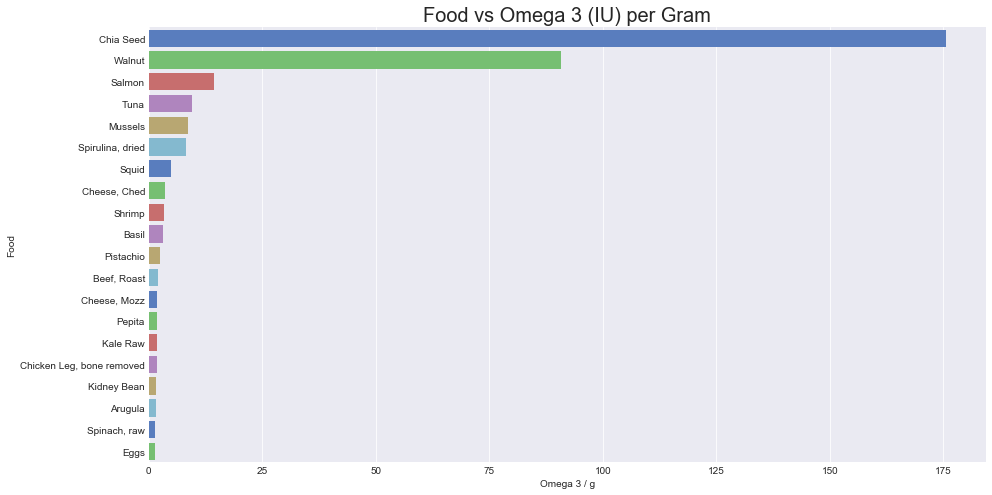

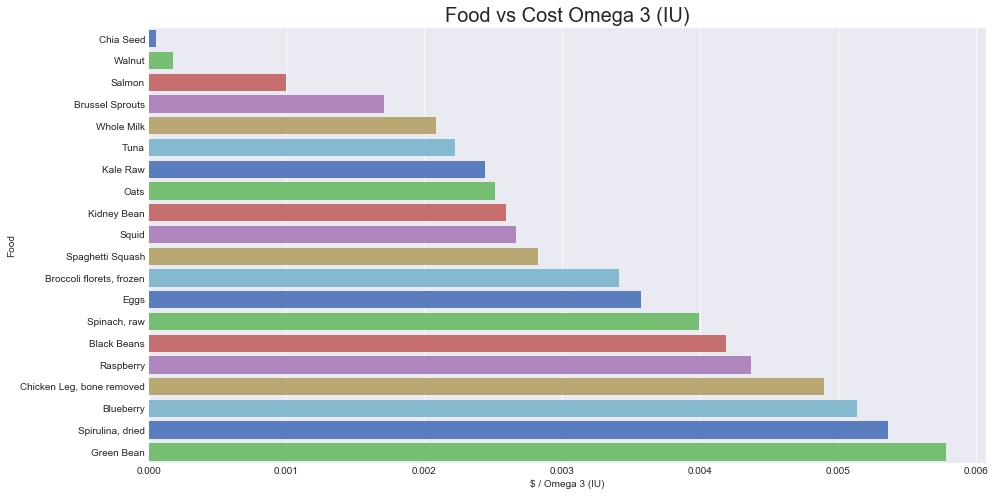

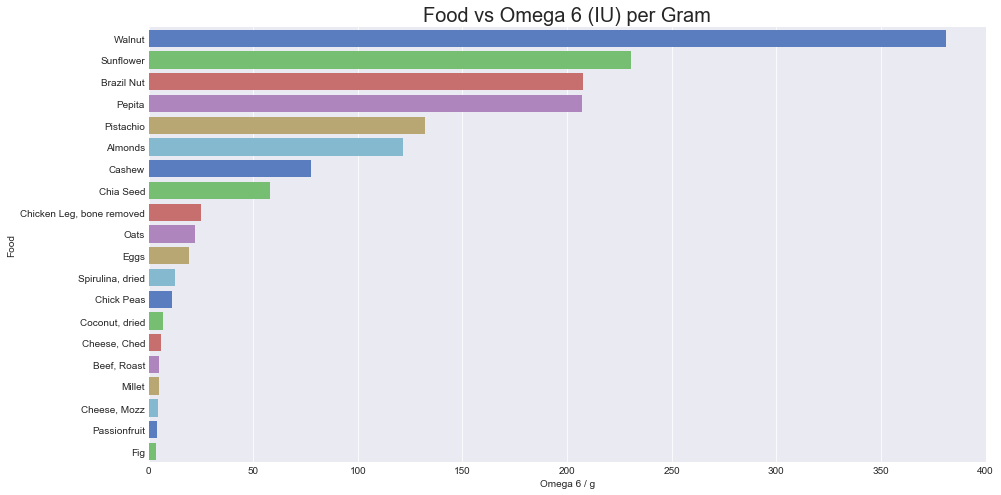

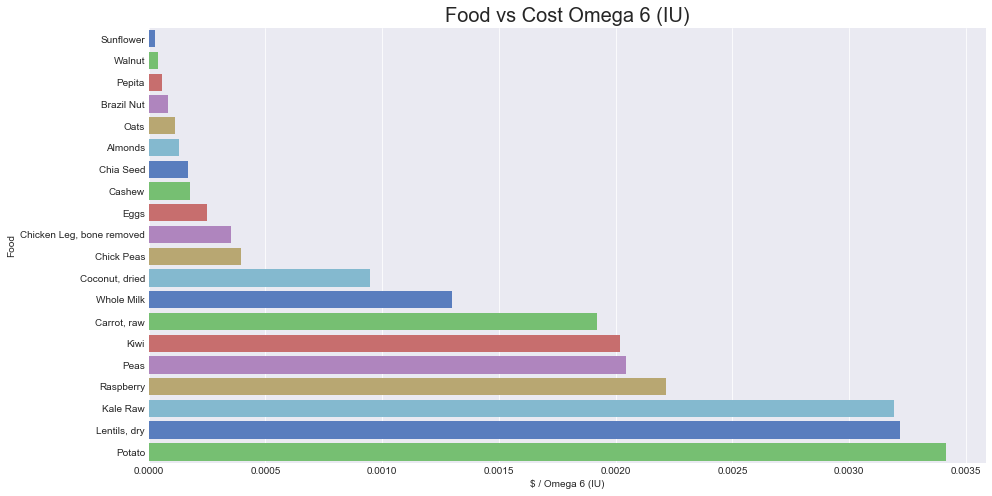

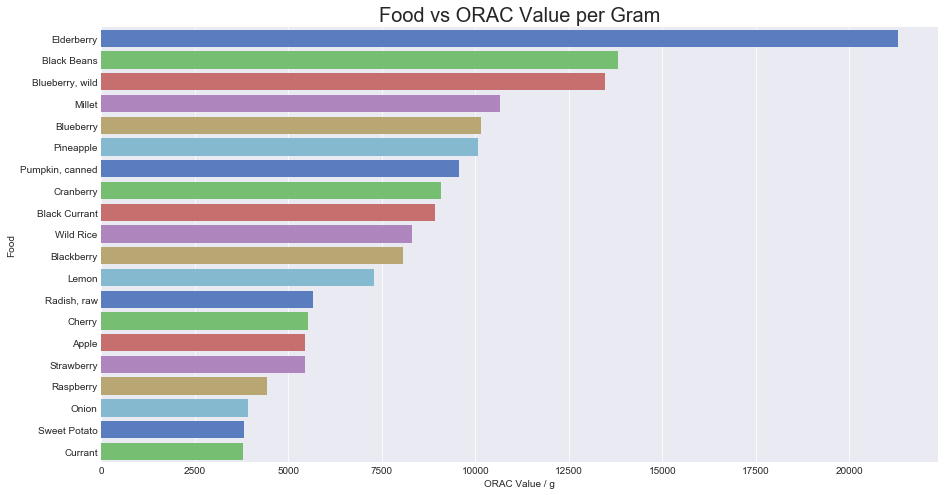

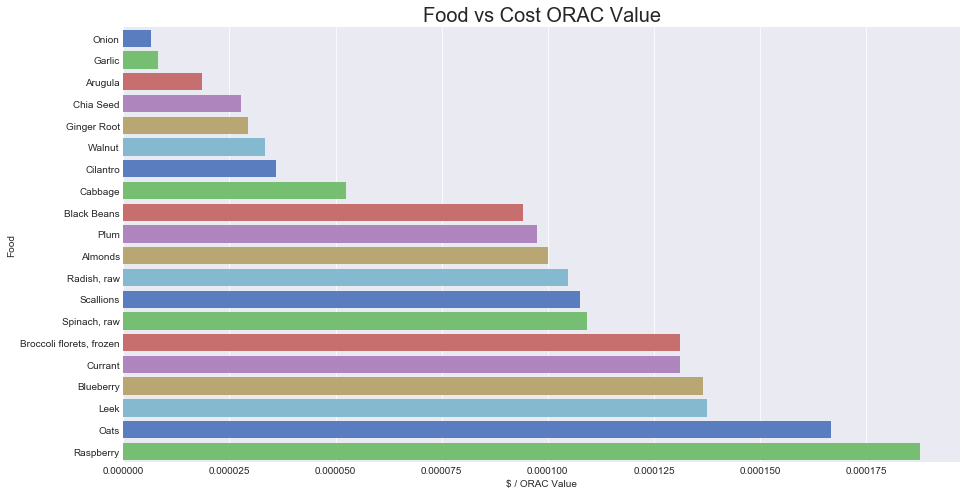

In [1555]:
#  'Omega 3',
#  'Omega 3 / g',
#  '$ / Omega 3 (IU)',

df_o3_h = df_cost.sort_values('Omega 3 / g', ascending = False, na_position='last')
df_o3_h = df_o3_h[:20]
sns.set_style("darkgrid")
cpg_bar = sns.barplot(y=df_o3_h['Food'],
                       x=df_o3_h['Omega 3 / g'],
                       palette='muted')
plt.title('Food vs Omega 3 (IU) per Gram', size = 20)
plt.show()


df_o3_cost = df_cost.sort_values('$ / Omega 3 (IU)', ascending = True, na_position='last')
df_o3_cost = df_o3_cost[:20]
sns.set_style("darkgrid")
cpp_bar = sns.barplot(y=df_o3_cost['Food'],
                       x=df_o3_cost['$ / Omega 3 (IU)'],
                       palette='muted')
plt.title('Food vs Cost Omega 3 (IU)', size = 20)
plt.show()

#  'Omega 6',
#  'Omega 6 / g',
#  '$ / Omega 6 (IU)',


df_o6_h = df_cost.sort_values('Omega 6 / g', ascending = False, na_position='last')
df_o6_h = df_o6_h[:20]
sns.set_style("darkgrid")
cpg_bar = sns.barplot(y=df_o6_h['Food'],
                       x=df_o6_h['Omega 6 / g'],
                       palette='muted')
plt.title('Food vs Omega 6 (IU) per Gram', size = 20)
plt.show()


df_o6_cost = df_cost.sort_values('$ / Omega 6 (IU)', ascending = True, na_position='last')
df_o6_cost = df_o6_cost[:20]
sns.set_style("darkgrid")
cpp_bar = sns.barplot(y=df_o6_cost['Food'],
                       x=df_o6_cost['$ / Omega 6 (IU)'],
                       palette='muted')
plt.title('Food vs Cost Omega 6 (IU)', size = 20)
plt.show()

#  'ORAC Value',
#  'ORAC Value / g',
#  '$ / ORAC Value',

df_orac_h = df_cost.sort_values('ORAC Value / g', ascending = False, na_position='last')
df_orac_h = df_orac_h[:20]
sns.set_style("darkgrid")
cpg_bar = sns.barplot(y=df_orac_h['Food'],
                       x=df_orac_h['ORAC Value / g'],
                       palette='muted')
plt.title('Food vs ORAC Value per Gram', size = 20)
plt.show()


df_orac_cost = df_cost.sort_values('$ / ORAC Value', ascending = True, na_position='last')
df_orac_cost = df_orac_cost[:20]
sns.set_style("darkgrid")
cpp_bar = sns.barplot(y=df_orac_cost['Food'],
                       x=df_orac_cost['$ / ORAC Value'],
                       palette='muted')
plt.title('Food vs Cost ORAC Value', size = 20)
plt.show()

In [1454]:
import pandas as pd
food = pd.read_csv("/Users/matt/Desktop/en.openfoodfacts.org.products.tsv", sep='\t',low_memory=False)
food.tail(10)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
134744,9900010011557,http://world-en.openfoodfacts.org/product/9900...,jeanbono,1375778997,2013-08-06T08:49:57Z,1379091297,2013-09-13T16:54:57Z,Miel de Camargue,Miel,250 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134745,9901198001583,http://world-en.openfoodfacts.org/product/9901...,openfoodfacts-contributors,1450594133,2015-12-20T06:48:53Z,1471893651,2016-08-22T19:20:51Z,Лимон — лайм,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134746,99044169,http://world-en.openfoodfacts.org/product/9904...,date-limite-app,1421873458,2015-01-21T20:50:58Z,1460898286,2016-04-17T13:04:46Z,Poireaux,NaN,1 kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134747,9906410000009,http://world-en.openfoodfacts.org/product/9906...,agamitsudo,1373480408,2013-07-10T18:20:08Z,1451851215,2016-01-03T20:00:15Z,Roussette du Bugey (2011),Vins blanc du Bugey,750 ml,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134748,9908278636246,http://world-en.openfoodfacts.org/product/9908...,andre,1360585770,2013-02-11T12:29:30Z,1389960647,2014-01-17T12:10:47Z,Szprot w oleju roslinnym,Sprot,170g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134749,99111250,http://world-en.openfoodfacts.org/product/9911...,balooval,1367163039,2013-04-28T15:30:39Z,1371690556,2013-06-20T01:09:16Z,Thé vert Earl grey,thé bio équitable,50 g,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,NaN
134750,9918,http://world-en.openfoodfacts.org/product/9918...,woshilapin,1430167954,2015-04-27T20:52:34Z,1430167992,2015-04-27T20:53:12Z,"Cheese cake thé vert, yuzu",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134751,9935010000003,http://world-en.openfoodfacts.org/product/9935...,sebleouf,1446293229,2015-10-31T12:07:09Z,1446376839,2015-11-01T11:20:39Z,Rillette d'oie,NaN,180 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134752,99410148,http://world-en.openfoodfacts.org/product/9941...,date-limite-app,1463936572,2016-05-22T17:02:52Z,1463941614,2016-05-22T18:26:54Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134753,9970229501521,http://world-en.openfoodfacts.org/product/9970...,tomato,1422099377,2015-01-24T11:36:17Z,1461433284,2016-04-23T17:41:24Z,乐吧泡菜味薯片,Leba pickle flavor potato chips,50 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5,1,'Proportion of NaNs in each column')

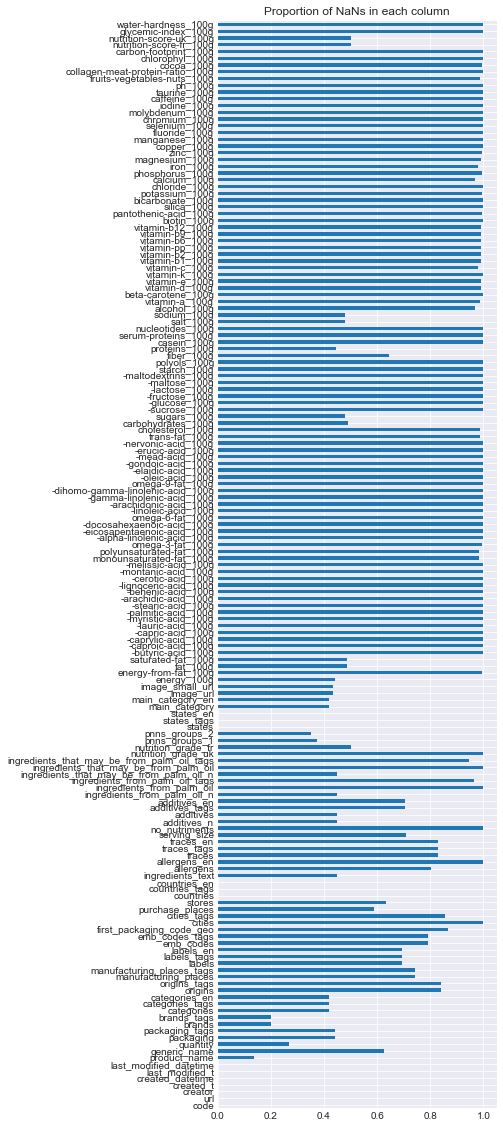

In [1455]:
plt.figure(figsize=(5, 20))
food.isnull().mean(axis=0).plot.barh()
plt.title("Proportion of NaNs in each column")

In [1456]:
food.dropna(axis=0, how='all')
food.head(50
         )

# food_countries = splitDataFrameList(no_null_objects(food, ["countries_en"]), "countries_en", ",")
# countries = food_countries["countries_en"].value_counts()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000024600,http://world-en.openfoodfacts.org/product/0000...,date-limite-app,1434530704,2015-06-17T08:45:04Z,1434535914,2015-06-17T10:11:54Z,Filet de bœuf,NaN,2.46 kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000027083,http://world-en.openfoodfacts.org/product/0000...,canieatthis-app,1472223782,2016-08-26T15:03:02Z,1472223782,2016-08-26T15:03:02Z,Marks % Spencer 2 Blueberry Muffins,NaN,230g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000027205,http://world-en.openfoodfacts.org/product/0000...,tacinte,1458238630,2016-03-17T18:17:10Z,1458238638,2016-03-17T18:17:18Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000000036252,http://world-en.openfoodfacts.org/product/0000...,tacinte,1422221701,2015-01-25T21:35:01Z,1422221855,2015-01-25T21:37:35Z,Lion Peanut x2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0000000039259,http://world-en.openfoodfacts.org/product/0000...,tacinte,1422221773,2015-01-25T21:36:13Z,1473538082,2016-09-10T20:08:02Z,Twix x2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0000000039529,http://world-en.openfoodfacts.org/product/0000...,teolemon,1420147051,2015-01-01T21:17:31Z,1473538082,2016-09-10T20:08:02Z,Pack de 2 Twix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0000000050913,http://world-en.openfoodfacts.org/product/0000...,canieatthis-app,1483186707,2016-12-31T12:18:27Z,1483186708,2016-12-31T12:18:28Z,"M&S Extrenely Chocolatey Milk, Dark & White Ch...",NaN,500g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0000000056434,http://world-en.openfoodfacts.org/product/0000...,canieatthis-app,1468005372,2016-07-08T19:16:12Z,1468005372,2016-07-08T19:16:12Z,diet lemonade by Sainsbury's,NaN,2l,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0000000290616,http://world-en.openfoodfacts.org/product/0000...,b7,1484605978,2017-01-16T22:32:58Z,1484606542,2017-01-16T22:42:22Z,Salade Cesar,Laitue en salade,0.980 kg,...,NaN,NaN,NaN,NaN,NaN,NaN,6.0,6.0,NaN,NaN


In [1457]:
off_usda = food[food['creator'] == 'usda-ndb-import']
off_usda

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g


In [1458]:
print(list(off_usda))



['code', 'url', 'creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime', 'product_name', 'generic_name', 'quantity', 'packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories', 'categories_tags', 'categories_en', 'origins', 'origins_tags', 'manufacturing_places', 'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_en', 'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities', 'cities_tags', 'purchase_places', 'stores', 'countries', 'countries_tags', 'countries_en', 'ingredients_text', 'allergens', 'allergens_en', 'traces', 'traces_tags', 'traces_en', 'serving_size', 'no_nutriments', 'additives_n', 'additives', 'additives_tags', 'additives_en', 'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil', 'ingredients_from_palm_oil_tags', 'ingredients_that_may_be_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil', 'ingredients_that_may_be_from_palm_oil_tags', 'nutrition_grade_uk', 'nutrition_grade_fr', 'pnns_groups_1', 

/Users/matt/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning:

Mean of empty slice.



Text(0.5,1,'Proportion of NaNs in each column')

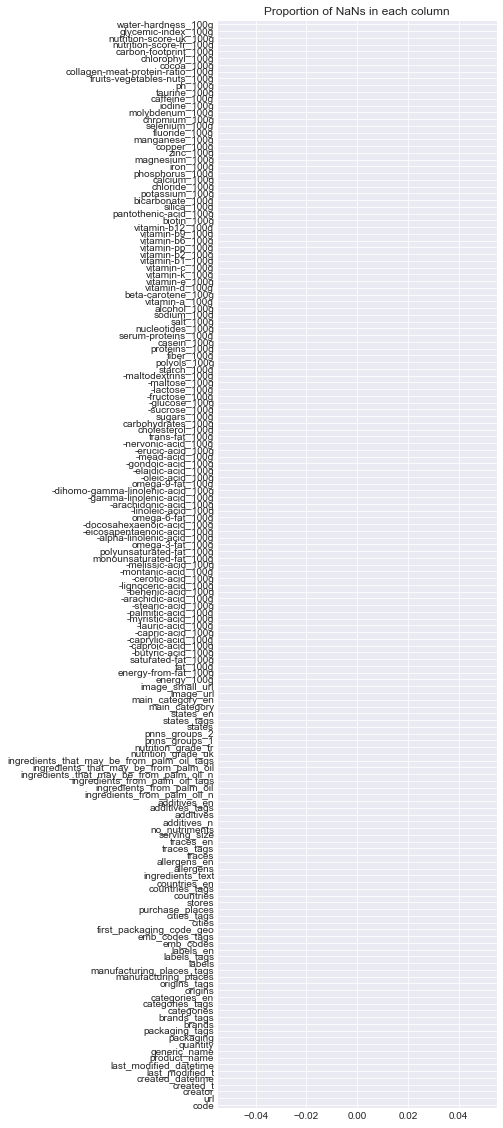

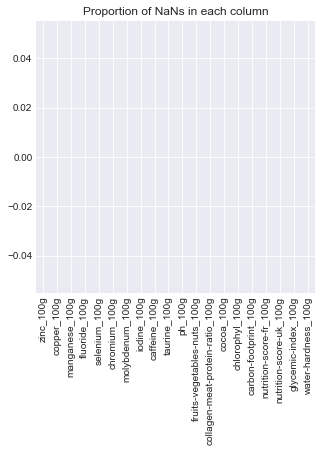

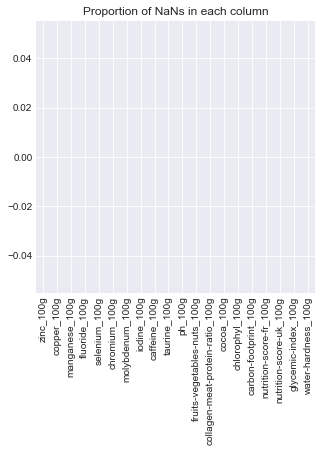

In [1459]:
plt.figure(figsize=(5, 20))
off_usda.isnull().mean(axis=0).plot.barh()
plt.title("Proportion of NaNs in each column")

# Sorted Visuals

plt.figure(figsize=(5, 5))
off_usda.isnull().mean(axis=0).sort_values(ascending= True)[-20:].plot.bar()
plt.title("Proportion of NaNs in each column")

plt.figure(figsize=(5, 5))
off_usda.isnull().mean(axis=0).sort_values(ascending= False)[-20:].plot.bar()
plt.title("Proportion of NaNs in each column")

In [1229]:
df_food = off_usda['product_name']
df_g_serv = 100
df_protein = off_usda['vitamin-b6_100g']
df_protein_g = df_protein / df_g_serv
df_protein = pd.concat([df_food, df_protein, df_protein_g], axis = 1)
df_protein.columns = ['Food', 'Protein_(g)', 'Protein_(g) / g']
df_protein = df_protein.sort_values('Protein_(g) / g', ascending = False).dropna()
df_protein[:20]

,Food,Protein_(g),Protein_(g) / g
94813,Trésor,1.20000,0.012000
7898,Aeroshot Energy Green Apple,0.66700,0.006670
22383,Blédilait 1er âge,0.27400,0.002740
58295,Magnésium Vitamine B6,0.26300,0.002630
51037,Levure de bière Vitalité Beauté,0.21500,0.002150
125919,Zanahorias &quot;VegaTajo&quot;,0.20000,0.002000
104607,Nesquick,0.09500,0.000950
116998,Multivitamin Arôme citron,0.04000,0.000400
85408,Magnesium,0.03510,0.000351
7061,Graines de chanvre crues décortiquées,0.03330,0.000333
